<a href="https://colab.research.google.com/github/Silfa2/nlpcc-ui-2025/blob/main/Class_4_Assignment_Silfa_Wulandari_2206090192.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Class 4 Assignment: Synthetic Data, Embeddings, and Semantic Analysis**

**Nama:** Silfa Wulandari

**NPM:** 2206090192


---

Notebook ini merupakan implementasi Tugas Kelas ke-4.
Tugas ini bertujuan untuk mempraktikkan pembuatan dataset sintetis menggunakan Large Language Models (LLM), menghasilkan representasi vektor (embeddings) dari teks tersebut, dan melakukan analisis semantik mendalam terhadap embeddings yang dihasilkan. Fokus utama meliputi penggunaan API LLM (seperti OpenAI dan Gemini), manajemen kunci API yang aman, serta penerapan teknik analisis seperti pencarian semantik dan clustering.

Seluruh proses, mulai dari pembuatan data hingga analisis dan diskusi temuan, akan didokumentasikan secara rinci dalam notebook ini.

In [15]:
!pip install -U kaleido plotly

# **Fase 1: Persiapan dan Pembuatan Data Sintetis**

Pada tahap pertama ini, akan membuat dataset sintetis yang akan digunakan untuk analisis *embedding* selanjutnya. Dataset ini akan terdiri dari ulasan (review) singkat untuk lima topik yang berbeda. Tujuan dari pembuatan data sintetis ini adalah untuk memiliki dataset yang terkontrol dengan label yang jelas, sehingga memudahkan kita dalam menganalisis performa model *embedding* dan teknik analisis yang akan diterapkan.

## 1.1 Pemilihan Domain dan Definisi Topik/Label

Saya telah memilih domain **"Ulasan Produk dan Karya Populer"**. Dalam domain ini, saya mendefinisikan lima (5) topik atau label yang berbeda untuk menghasilkan teks ulasan:

1.  **Review iPhone 13 Pro**: Ulasan mengenai salah satu produk smartphone populer dari Apple, fokus pada fitur, performa, dan pengalaman pengguna.
2.  **Review film AADC (Ada Apa Dengan Cinta)**: Ulasan mengenai film remaja legendaris Indonesia, mencakup aspek cerita, akting, sinematografi, dan dampaknya.
3.  **Review Kacamata AR untuk belajar**: Ulasan mengenai teknologi kacamata Augmented Reality yang diaplikasikan dalam konteks pembelajaran, membahas manfaat, tantangan, dan pengalaman pengguna.
4.  **Review Novel Harry Potter**: Ulasan mengenai seri novel fantasi terkenal karya J.K. Rowling, meliputi alur cerita, pengembangan karakter, dunia sihir, dan pesan moral.
5.  **Review Google Gemini**: Ulasan mengenai model AI multimodal dari Google, membahas kemampuan, potensi, serta pengalaman awal pengguna dalam berbagai kasus penggunaan.

Pemilihan topik ini didasarkan pada variasi jenis entitas yang diulas (produk teknologi, film, teknologi edukasi, karya sastra, dan model AI) untuk menciptakan dataset yang cukup beragam.

## 1.2 Proses Pembuatan Data Sintetis
 Setiap topik akan memiliki 30 ulasan singkat, dengan masing-masing ulasan terdiri dari 3-5 kalimat. Fokusnya adalah membuat ulasan yang relevan dan mencerminkan sentimen atau aspek yang umum dibicarakan terkait topik tersebut.




Prompt untuk  **Fase 1: Persiapan dan Pembuatan Data Sintetis**
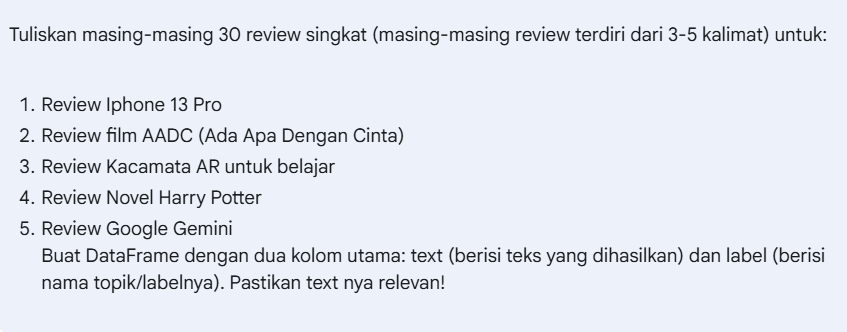

In [17]:
import pandas as pd

# --- Data Review ---

# 1. Review iPhone 13 Pro
iphone_reviews = [
    "Kamera iPhone 13 Pro ini benar-benar game changer, terutama fitur Cinematic Mode-nya. Layar ProMotion 120Hz juga membuat scrolling terasa sangat mulus. Baterainya pun tahan seharian penuh untuk penggunaan normal, sangat memuaskan!",
    "Upgrade dari iPhone lama ke 13 Pro terasa signifikan. Performa A15 Bionic sangat cepat untuk multitasking dan gaming. Build quality-nya juga terasa premium dan kokoh, meskipun harganya memang mahal.",
    "Saya suka hasil foto low-light dari iPhone 13 Pro, detailnya tetap terjaga. Ukurannya pas di tangan, tidak terlalu besar. Sayangnya, pengisian dayanya masih terasa lambat dibandingkan kompetitor Android.",
    "Layar Super Retina XDR di iPhone 13 Pro sangat memanjakan mata, warnanya akurat dan cerah. Fitur ProMotion adaptif membantu menghemat baterai. Desainnya elegan, meskipun notch-nya masih ada.",
    "Untuk kebutuhan videografi profesional, iPhone 13 Pro dengan ProRes adalah pilihan solid. Stabilisasi videonya luar biasa. Ekosistem Apple juga menjadi nilai tambah yang besar bagi saya.",
    "Awalnya ragu karena harganya, tapi setelah pakai iPhone 13 Pro, saya merasa worth it. Kecepatan dan responsivitasnya tak tertandingi. Integrasi antar perangkat Apple juga sangat seamless.",
    "Fitur fotografi makro di iPhone 13 Pro sangat mengesankan, bisa menangkap detail kecil dengan jelas. Daya tahan baterai meningkat drastis dari seri sebelumnya. Pilihan warna Sierra Blue juga cantik.",
    "Meskipun peningkatannya tidak revolusioner dari 12 Pro, iPhone 13 Pro menyempurnakan banyak aspek. Chip A15 sangat bertenaga. Saya harap Apple bisa menghilangkan notch di seri berikutnya.",
    "Pengalaman menggunakan iPhone 13 Pro sehari-hari sangat menyenangkan. Semuanya terasa cepat dan lancar. Kualitas speaker stereonya juga jernih dan lantang.",
    "Investasi yang cukup besar, tapi iPhone 13 Pro memberikan performa dan kualitas kamera terbaik di kelasnya. iOS juga menawarkan pengalaman pengguna yang intuitif. Sangat direkomendasikan jika budget mencukupi.",
    "Saya sangat terkesan dengan kemampuan zoom optik pada iPhone 13 Pro. Hasilnya tetap tajam. Desain stainless steel memberikan kesan mewah, tapi mudah meninggalkan bekas sidik jari.",
    "Bagi pengguna yang mencari ponsel dengan kamera serbaguna dan performa tinggi, iPhone 13 Pro adalah jawabannya. Mode Sinematik sangat menyenangkan untuk dicoba. Daya tahan baterainya juga oke.",
    "Layar ProMotion 120Hz benar-benar mengubah cara saya berinteraksi dengan ponsel. Semuanya terasa lebih responsif. Kualitas rekaman video 4K-nya juga sangat detail dan stabil.",
    "iPhone 13 Pro adalah paket lengkap: desain premium, performa kencang, kamera luar biasa, dan baterai awet. Harganya memang premium, tapi sepadan dengan apa yang ditawarkan. Pilihan tepat untuk jangka panjang.",
    "Peningkatan dari sisi baterai sangat terasa di iPhone 13 Pro. Saya tidak perlu khawatir kehabisan daya di tengah hari. Kualitas foto potretnya juga semakin baik dengan sensor LiDAR.",
    "Notch yang lebih kecil sedikit membantu, tapi saya menantikan desain full-screen. Performa gaming di iPhone 13 Pro sangat lancar tanpa lag. Pilihan penyimpanan hingga 1TB juga bagus.",
    "Kualitas material iPhone 13 Pro terasa sangat solid. Layarnya sangat jernih dan enak dilihat. Fitur Photographic Styles memberikan fleksibilitas lebih dalam mengambil foto.",
    "Jika Anda seorang kreator konten, iPhone 13 Pro adalah alat yang sangat mumpuni. Kualitas video dan fotonya profesional. Harganya sebanding dengan kemampuannya.",
    "Saya suka bagaimana iPhone 13 Pro mengoptimalkan software dan hardware. Semuanya berjalan harmonis. Update iOS juga terjamin untuk beberapa tahun ke depan.",
    "Meskipun beratnya sedikit terasa, iPhone 13 Pro nyaman digenggam. Kualitas panggilan suara jernih. Fitur MagSafe juga praktis untuk pengisian daya dan aksesoris.",
    "Pilihan warna Graphite terlihat sangat elegan di iPhone 13 Pro. Performa chip A15 Bionic sangat efisien daya. Saya puas dengan pembelian ini.",
    "Kamera telefoto iPhone 13 Pro sangat berguna untuk mengambil objek jarak jauh. Detailnya masih bagus. Antarmuka iOS mudah digunakan bahkan untuk pemula.",
    "Layar iPhone 13 Pro sangat responsif terhadap sentuhan. Warna yang dihasilkan sangat akurat. Cocok untuk editing foto dan video langsung di ponsel.",
    "Build quality iPhone 13 Pro tidak perlu diragukan lagi. Terasa sangat kokoh dan premium. Fitur Face ID juga cepat dan akurat.",
    "Bagi yang mencari pengalaman iOS terbaik dengan kamera mumpuni, iPhone 13 Pro adalah pilihan utama. Harganya memang tinggi, tapi kualitasnya terjamin. Saya sangat merekomendasikannya.",
    "Mode malam pada kamera iPhone 13 Pro menghasilkan foto yang terang dan minim noise. Sangat impresif. Daya tahan baterainya juga cukup untuk penggunaan berat.",
    "Desain iPhone 13 Pro masih mirip dengan pendahulunya, tapi dengan beberapa penyempurnaan. Layar ProMotion adalah fitur favorit saya. Performa keseluruhannya sangat memuaskan.",
    "iPhone 13 Pro menawarkan kombinasi sempurna antara desain, performa, dan kamera. Ekosistem Apple yang kuat menjadi nilai tambah. Cocok untuk produktivitas dan hiburan.",
    "Saya mengapresiasi peningkatan pada sensor kamera utama iPhone 13 Pro. Hasil fotonya lebih detail dan warnanya natural. Baterainya juga lebih awet dari yang saya harapkan.",
    "Secara keseluruhan, iPhone 13 Pro adalah ponsel flagship yang luar biasa. Mungkin bukan upgrade besar bagi pengguna 12 Pro, tapi bagi pengguna seri lama, ini sangat worth it. Kualitasnya terasa di setiap aspek."
]

# 2. Review film AADC (Ada Apa Dengan Cinta)
aadc_reviews = [
    "AADC adalah film remaja Indonesia yang ikonik dan tak lekang oleh waktu. Kisah cinta Rangga dan Cinta, lengkap dengan puisi-puisinya, selalu berhasil membuat baper. Soundtracknya juga legendaris!",
    "Menonton AADC selalu membawa nostalgia masa SMA. Akting Dian Sastro dan Nicholas Saputra sangat natural dan chemistry-nya kuat. Film ini berhasil menangkap esensi persahabatan dan cinta pertama.",
    "Dialog-dialog puitis di AADC menjadi salah satu daya tarik utamanya. Meskipun plotnya sederhana, pengemasannya sangat apik. Film ini menjadi standar baru film remaja Indonesia pada masanya.",
    "Saya suka bagaimana AADC menggambarkan kehidupan remaja Jakarta di awal 2000-an. Geng Cinta sangat solid dan relatable. Endingnya yang menggantung sukses membuat penonton penasaran.",
    "AADC bukan hanya film cinta biasa, tapi juga menyentuh isu sosial dan keluarga. Musikalisasi puisi oleh Melly Goeslaw sangat indah. Film wajib tonton bagi generasi 90-an dan 2000-an.",
    "Karakter Rangga yang misterius dan puitis menjadi idola banyak remaja. Cinta yang cerdas dan berani juga inspiratif. AADC adalah paket lengkap drama, romansa, dan persahabatan.",
    "Setiap adegan di AADC terasa memorable, dari pertemuan pertama di perpustakaan hingga perpisahan di bandara. Sinematografinya sederhana namun efektif. Film ini punya tempat spesial di hati saya.",
    "Meskipun sudah berkali-kali ditonton, AADC tidak pernah membosankan. Pesan tentang kejujuran dan keberanian dalam cinta masih relevan. Akting para pemain pendukungnya juga bagus.",
    "AADC berhasil menciptakan fenomena budaya di Indonesia. Banyak kutipan dan adegannya yang menjadi viral. Film ini membuktikan kualitas sinema Indonesia bisa bersaing.",
    "Kekuatan AADC terletak pada naskahnya yang kuat dan karakterisasi yang mendalam. Kita bisa merasakan emosi setiap tokohnya. Film ini adalah sebuah mahakarya dari Riri Riza dan Mira Lesmana.",
    "Soundtrack AADC yang digarap Anto Hoed dan Melly Goeslaw sangat ikonik. Setiap lagu memiliki makna dan memperkuat adegan. Film ini adalah perpaduan sempurna antara visual dan audio.",
    "Chemistry antara Cinta dan Rangga adalah nyawa dari film AADC. Tatapan mata dan dialog mereka selalu bikin deg-degan. Film ini sukses membuat standar 'pasangan ideal' bagi banyak orang.",
    "AADC adalah film yang berhasil membuat saya jatuh cinta pada puisi. Penggunaan bahasa yang indah dan puitis menjadi ciri khasnya. Film ini lebih dari sekadar hiburan.",
    "Persahabatan geng Cinta (Milly, Karmen, Maura, Alya) sangat menghangatkan hati. Mereka saling mendukung dalam suka dan duka. Aspek ini membuat AADC semakin relatable.",
    "Meskipun endingnya membuat gemas, AADC tetap menjadi salah satu film Indonesia terbaik sepanjang masa. Pengaruhnya terhadap budaya pop sangat besar. Wajib ditonton ulang sesekali.",
    "AADC adalah cerminan generasi muda pada masanya. Gaya berpakaian, musik, dan cara bergaulnya sangat otentik. Film ini seperti kapsul waktu yang menyenangkan.",
    "Akting para pemain AADC, terutama Dian Sastro, patut diacungi jempol. Ia berhasil menghidupkan karakter Cinta dengan sangat baik. Film ini melambungkan namanya.",
    "Saya suka bagaimana AADC tidak hanya fokus pada romansa, tapi juga pada pengembangan diri masing-masing karakter. Ada pesan positif yang bisa diambil. Film yang cerdas.",
    "AADC adalah film yang bisa dinikmati oleh semua kalangan, tidak hanya remaja. Ceritanya universal dan menyentuh. Kualitas produksinya juga baik untuk ukuran film Indonesia saat itu.",
    "Setiap kali mendengar lagu 'Ada Apa Dengan Cinta?', pasti langsung teringat film ini. Kekuatan musik dalam film sangat terasa. AADC adalah paket nostalgia yang komplit.",
    "Rangga dengan segala misteri dan kutipan puitisnya adalah karakter yang tak terlupakan. Nicholas Saputra memerankannya dengan sangat pas. Pesonanya masih terasa hingga kini.",
    "AADC mengajarkan tentang pentingnya komunikasi dalam hubungan. Kesalahpahaman antara Cinta dan Rangga menjadi bumbu cerita. Film yang membuat kita merenung.",
    "Visualisasi puisi dalam beberapa adegan AADC sangat kreatif. Membuat puisi terasa lebih hidup dan menarik. Film ini berhasil mempopulerkan sastra di kalangan remaja.",
    "Meskipun sudah 20 tahun lebih, AADC tetap relevan. Tema cinta, persahabatan, dan pencarian jati diri selalu aktual. Film ini adalah klasik modern sinema Indonesia.",
    "AADC adalah film yang membuat saya percaya pada kekuatan kata-kata. Puisi bisa menjadi jembatan untuk mengungkapkan perasaan. Film yang sangat berkesan.",
    "Konflik keluarga yang dialami Rangga menambah kedalaman cerita AADC. Membuat karakternya lebih kompleks. Film ini tidak hitam putih.",
    "AADC adalah film yang berhasil membuat penonton ikut merasakan rollercoaster emosi. Dari senang, sedih, marah, hingga baper. Pengalaman menonton yang lengkap.",
    "Keberanian Cinta untuk mengejar Rangga ke bandara adalah adegan ikonik. Menunjukkan bahwa perempuan juga bisa proaktif. Pesan emansipasi yang halus.",
    "AADC adalah film yang akan selalu dikenang. Generasi baru pun masih bisa menikmatinya. Bukti bahwa cerita yang bagus akan abadi.",
    "Secara keseluruhan, AADC adalah film yang sempurna dalam ketidaksempurnaannya. Ada kehangatan dan kejujuran yang membuatnya istimewa. Sebuah masterpiece yang layak diapresiasi."
]

# 3. Review Kacamata AR untuk belajar
ar_glasses_reviews = [
    "Kacamata AR ini mengubah cara saya belajar sejarah! Bisa melihat rekonstruksi 3D candi Borobudur langsung di depan mata sangat imersif. Materi jadi lebih mudah diingat dan menyenangkan.",
    "Untuk pelajaran biologi, kacamata AR ini sangat membantu. Saya bisa membedah organ tubuh manusia secara virtual tanpa rasa takut. Konsep anatomi jadi lebih jelas dan interaktif.",
    "Awalnya agak pusing menggunakan kacamata AR ini, tapi setelah terbiasa jadi seru. Belajar fisika dengan simulasi eksperimen virtual jauh lebih menarik daripada hanya membaca buku. Potensinya besar sekali.",
    "Fitur anotasi objek di kacamata AR ini sangat berguna. Saya bisa menandai bagian-bagian penting dari model 3D mesin. Sayangnya, daya tahan baterainya masih perlu ditingkatkan untuk sesi belajar panjang.",
    "Kacamata AR ini membuat belajar bahasa asing jadi lebih kontekstual. Bisa melihat terjemahan objek secara real-time sangat membantu. Namun, pilihan konten pembelajarannya masih terbatas.",
    "Anak saya jadi lebih termotivasi belajar matematika dengan kacamata AR ini. Visualisasi konsep geometri abstrak jadi lebih mudah dipahami. Harganya memang masih mahal untuk penggunaan pribadi.",
    "Sebagai guru, saya melihat potensi besar kacamata AR untuk meningkatkan engagement siswa. Pembelajaran jadi lebih aktif dan tidak monoton. Perlu pelatihan khusus untuk mengintegrasikannya ke kurikulum.",
    "Kacamata AR ini ringan dan cukup nyaman dipakai dalam waktu lama. Kualitas visualnya jernih. Saya harap ada lebih banyak aplikasi edukasi yang kompatibel di masa depan.",
    "Belajar astronomi dengan kacamata AR ini serasa menjelajah luar angkasa. Bisa melihat planet dan galaksi dari dekat sangat menakjubkan. Pengalaman belajar yang tak terlupakan.",
    "Fitur kolaborasi virtual di kacamata AR ini memungkinkan diskusi kelompok yang lebih interaktif. Bisa mengerjakan proyek bersama dalam ruang virtual. Namun, koneksi internet stabil sangat dibutuhkan.",
    "Kacamata AR ini membantu saya memahami konsep arsitektur yang kompleks. Bisa melihat model bangunan dalam skala nyata sangat bermanfaat. Investasi yang bagus untuk mahasiswa desain.",
    "Saya sedikit khawatir tentang efek jangka panjang penggunaan kacamata AR pada mata. Perlu ada panduan penggunaan yang jelas. Tapi secara umum, teknologinya sangat menjanjikan untuk pendidikan.",
    "Konten pembelajaran interaktif di kacamata AR ini dirancang dengan baik. Ada kuis dan tantangan yang membuat belajar tidak membosankan. Saya jadi lebih semangat belajar mandiri.",
    "Kacamata AR ini membuka pintu baru dalam dunia pendidikan. Pembelajaran bisa disesuaikan dengan gaya belajar masing-masing individu. Potensi personalisasi sangat besar.",
    "Instalasi dan penggunaan kacamata AR ini cukup mudah. Antarmukanya intuitif. Saya harap harganya bisa lebih terjangkau agar semua siswa bisa merasakan manfaatnya.",
    "Belajar tentang ekosistem laut dengan kacamata AR ini sangat seru. Bisa 'berenang' bersama ikan dan melihat terumbu karang secara virtual. Membuat ilmu pengetahuan alam jadi lebih hidup.",
    "Kacamata AR ini sangat membantu siswa dengan gaya belajar visual. Informasi disajikan dengan cara yang menarik dan mudah dicerna. Alat bantu yang efektif.",
    "Saya merasa kacamata AR ini bisa mengurangi kesenjangan akses terhadap fasilitas laboratorium. Eksperimen sains bisa dilakukan secara virtual dengan aman. Inovasi yang brilian.",
    "Meskipun teknologinya canggih, kacamata AR ini tetap membutuhkan konten berkualitas. Peran guru sebagai fasilitator tetap penting. Bukan pengganti interaksi manusia.",
    "Kacamata AR ini memberikan pengalaman belajar yang lebih mendalam dan berkesan. Materi yang dipelajari jadi lebih nempel di otak. Saya sangat merekomendasikannya untuk dicoba.",
    "Desain kacamata AR ini cukup stylish, tidak terlihat aneh saat dipakai. Bobotnya juga terdistribusi dengan baik. Nyaman untuk sesi belajar beberapa jam.",
    "Saya berharap ada integrasi yang lebih baik antara kacamata AR dengan platform e-learning yang sudah ada. Akan memudahkan sinkronisasi materi. Potensinya belum tergali maksimal.",
    "Kacamata AR ini sangat berguna untuk pelatihan keterampilan praktis. Misalnya, simulasi perbaikan mesin atau prosedur medis. Belajar sambil praktek secara virtual.",
    "Fitur gamifikasi dalam beberapa aplikasi belajar AR membuat prosesnya jadi adiktif. Anak-anak jadi tidak sadar kalau sedang belajar. Pendekatan yang cerdas.",
    "Kacamata AR ini adalah investasi masa depan untuk pendidikan. Meskipun masih ada tantangan, manfaatnya jauh lebih besar. Saya optimis teknologi ini akan semakin berkembang.",
    "Saya suka bagaimana kacamata AR ini bisa membawa objek-objek museum ke dalam kelas. Belajar sejarah seni jadi lebih menyenangkan. Pengalaman yang imersif.",
    "Kualitas grafis pada beberapa aplikasi AR edukasi sangat detail dan realistis. Membuat visualisasi konsep abstrak jadi lebih mudah. Teknologi yang sangat membantu.",
    "Kacamata AR ini mendorong rasa ingin tahu dan eksplorasi. Siswa bisa belajar dengan kecepatan mereka sendiri. Pembelajaran jadi lebih personal.",
    "Penting untuk memastikan konten AR edukasi akurat dan sesuai dengan kurikulum. Perlu ada quality control yang ketat. Agar tidak menyesatkan siswa.",
    "Secara keseluruhan, kacamata AR untuk belajar adalah terobosan yang menjanjikan. Memberikan dimensi baru dalam proses transfer ilmu. Saya antusias melihat perkembangannya."
]

# 4. Review Novel Harry Potter
harry_potter_reviews = [
    "Seri Harry Potter adalah mahakarya fantasi yang tak terlupakan. Dunia sihir yang diciptakan J.K. Rowling begitu detail dan memikat. Petualangan Harry, Ron, dan Hermione selalu seru untuk diikuti.",
    "Saya tumbuh bersama Harry Potter, dari buku pertama hingga terakhir. Perkembangan karakter mereka terasa sangat nyata. Tema persahabatan, keberanian, dan cinta menjadi inti cerita yang kuat.",
    "Membaca Harry Potter seperti masuk ke dunia lain. Hogwarts terasa seperti rumah kedua. Setiap buku selalu penuh kejutan dan misteri yang membuat penasaran.",
    "J.K. Rowling adalah pencerita yang ulung. Plot Harry Potter sangat kompleks namun rapi. Banyak pesan moral yang bisa diambil dari kisah ini.",
    "Meskipun ditujukan untuk anak-anak dan remaja, Harry Potter juga dinikmati oleh orang dewasa. Kedalaman cerita dan karakter membuatnya universal. Buku yang wajib dibaca setidaknya sekali seumur hidup.",
    "Karakter Severus Snape adalah salah satu yang paling kompleks dan menarik dalam Harry Potter. Kisah masa lalunya sangat menyentuh. Membuat kita berpikir ulang tentang definisi baik dan jahat.",
    "Dunia sihir Harry Potter begitu kaya akan detail, mulai dari mantra, makhluk gaib, hingga sejarah sihir. Imajinasi J.K. Rowling sungguh luar biasa. Membuat kita ingin menjadi penyihir.",
    "Setiap buku Harry Potter memiliki nuansa yang berbeda, semakin gelap seiring bertambahnya usia Harry. Ini mencerminkan perjalanan menuju kedewasaan. Sangat brilian.",
    "Saya suka bagaimana Harry Potter mengajarkan tentang pentingnya melawan ketidakadilan dan prasangka. Tema toleransi dan penerimaan sangat kental. Pesan yang relevan hingga kini.",
    "Membaca ulang Harry Potter selalu memberikan perspektif baru. Banyak detail kecil yang baru disadari. Buku yang tidak pernah membosankan.",
    "Kematian beberapa karakter favorit di Harry Potter memang menyedihkan, tapi itu membuat ceritanya semakin realistis dan emosional. J.K. Rowling berani mengambil risiko.",
    "Harry Potter bukan hanya tentang sihir, tapi juga tentang perjuangan melawan kejahatan dan menemukan jati diri. Banyak pelajaran hidup yang bisa dipetik. Buku yang sangat inspiratif.",
    "Saya mengagumi konsistensi J.K. Rowling dalam membangun dunia Harry Potter. Semuanya terasa terhubung dan masuk akal. Detailnya sangat dipikirkan.",
    "Persahabatan trio emas (Harry, Ron, Hermione) adalah jantung dari cerita Harry Potter. Mereka saling melengkapi dan mendukung. Contoh persahabatan sejati.",
    "Meskipun filmnya bagus, buku Harry Potter tetap memberikan pengalaman yang lebih kaya dan mendalam. Banyak detail cerita yang tidak masuk film. Wajib baca bukunya dulu.",
    "Harry Potter berhasil menciptakan generasi pembaca baru. Anak-anak jadi suka membaca karena buku ini. Pengaruhnya terhadap literasi sangat besar.",
    "Karakter Dumbledore sangat bijaksana dan penuh teka-teki. Nasihat-nasihatnya selalu berkesan. Sosok mentor yang ideal bagi Harry.",
    "Saya suka bagaimana Harry Potter mengeksplorasi sisi gelap dunia sihir. Tidak semuanya indah dan menyenangkan. Membuat ceritanya lebih berbobot.",
    "Plot twist di akhir setiap buku Harry Potter selalu mengejutkan. J.K. Rowling pandai menjaga rasa penasaran pembaca. Sulit berhenti membaca.",
    "Harry Potter adalah pelarian yang sempurna dari dunia nyata. Membaca buku ini seperti liburan ke dunia sihir. Sangat menghibur dan imajinatif.",
    "Tema cinta dalam berbagai bentuk (keluarga, persahabatan, romansa) sangat kuat di Harry Potter. Menunjukkan bahwa cinta adalah sihir terkuat. Pesan yang indah.",
    "Saya terinspirasi oleh keberanian Neville Longbottom. Karakternya berkembang pesat dari penakut menjadi pahlawan. Bukti bahwa semua orang bisa berubah.",
    "Harry Potter mengajarkan bahwa pilihan kitalah yang menentukan siapa diri kita, bukan kemampuan kita. Pesan moral yang sangat kuat. Membuat kita merenung.",
    "Dunia Quidditch sangat seru dan kompetitif. Menambah warna dalam cerita Harry Potter. Olahraga fiksi yang paling terkenal.",
    "Meskipun ceritanya sudah selesai, dunia Harry Potter terus hidup melalui berbagai media. Penggemarnya sangat loyal. Fenomena budaya yang luar biasa.",
    "Saya suka bagaimana J.K. Rowling menyelipkan humor di tengah cerita Harry Potter yang terkadang gelap. Membuat ceritanya seimbang. Gaya penulisannya khas.",
    "Karakter Luna Lovegood sangat unik dan menyenangkan. Mengajarkan kita untuk menjadi diri sendiri dan tidak takut berbeda. Sosok yang menyegarkan.",
    "Harry Potter adalah cerita tentang harapan di tengah kegelapan. Meskipun banyak rintangan, selalu ada cahaya di ujung terowongan. Pesan yang optimis.",
    "Saya merekomendasikan Harry Potter kepada siapa saja yang suka cerita fantasi petualangan. Dijamin tidak akan kecewa. Buku yang akan selalu dikenang.",
    "Secara keseluruhan, Harry Potter adalah seri buku yang fenomenal. Mengubah lanskap literatur anak dan remaja. Sebuah warisan abadi dari J.K. Rowling."
]

# 5. Review Google Gemini
gemini_reviews = [
    "Google Gemini sebagai model AI multimodal sangat mengesankan. Kemampuannya memahami dan menghasilkan teks, gambar, serta kode secara bersamaan membuka banyak potensi. Ini adalah langkah besar bagi AI generatif.",
    "Saya sudah mencoba Gemini Pro melalui API, dan hasilnya cukup menjanjikan untuk tugas penulisan kreatif dan brainstorming ide. Responsnya cepat dan relevan. Masih perlu eksplorasi lebih lanjut untuk kasus penggunaan kompleks.",
    "Kemampuan Gemini untuk menjelaskan kode program dan bahkan men-debugnya cukup membantu. Ini bisa menjadi alat yang berguna bagi developer. Namun, terkadang penjelasannya masih terlalu umum.",
    "Sebagai pesaing GPT-4, Gemini menunjukkan performa yang kompetitif di beberapa benchmark. Saya penasaran dengan versi Ultra-nya. Persaingan ini bagus untuk inovasi AI.",
    "Saya menggunakan Gemini untuk merangkum artikel panjang, dan hasilnya cukup akurat serta hemat waktu. Fitur multimodalitasnya belum saya coba secara maksimal. Sejauh ini cukup puas.",
    "Potensi Gemini dalam dunia pendidikan sangat besar, misalnya untuk membuat materi pembelajaran interaktif yang menggabungkan teks dan visual. Perlu diintegrasikan dengan platform yang ada. Semoga aksesnya lebih mudah.",
    "Terkadang Gemini masih memberikan jawaban yang terlalu normatif atau 'aman', kurang berani memberikan opini yang tajam. Mungkin ini terkait dengan safety filternya. Tapi untuk informasi faktual, cukup bisa diandalkan.",
    "Saya mencoba meminta Gemini membuatkan cerita pendek berdasarkan gambar, dan hasilnya cukup kreatif. Kemampuan menghubungkan visual dan narasi ini menarik. Perlu diasah lagi agar lebih natural.",
    "Integrasi Gemini ke dalam produk Google lainnya seperti Bard dan Search akan sangat menarik. Bisa mengubah cara kita berinteraksi dengan informasi. Saya menantikan perkembangannya.",
    "Sebagai model AI yang masih baru, Gemini pasti akan terus berkembang. Saya berharap Google terus melakukan perbaikan dan penambahan fitur. Potensinya untuk berbagai industri sangat luas.",
    "Saya menggunakan Gemini untuk membantu menyusun email profesional, dan hasilnya cukup baik. Menghemat waktu dan memberikan alternatif susunan kalimat. Alat produktivitas yang berguna.",
    "Kekhawatiran tentang bias dalam data training AI seperti Gemini tetap ada. Penting bagi Google untuk transparan mengenai hal ini. Pengembangan AI yang bertanggung jawab adalah kunci.",
    "Gemini terasa lebih 'segar' dibandingkan beberapa model AI sebelumnya. Kemampuan reasoning-nya pada beberapa kasus cukup mengejutkan. Tapi jangan terlalu cepat percaya semua outputnya.",
    "Saya mencoba fitur analisis data sederhana dengan Gemini, dan ia bisa memberikan insight awal yang menarik. Tentu bukan pengganti analisis mendalam, tapi sebagai titik awal cukup bagus. Perlu input data yang jelas.",
    "Dokumentasi API Gemini cukup jelas dan mudah diikuti. Memudahkan developer untuk mulai bereksperimen. Saya harap ada lebih banyak contoh kasus penggunaan yang praktis.",
    "Gemini bisa menjadi asisten virtual yang sangat cerdas di masa depan. Membantu tugas sehari-hari, dari penjadwalan hingga pencarian informasi kompleks. Visi yang ambisius.",
    "Saya membandingkan output Gemini dengan model lain untuk tugas terjemahan, dan kualitasnya bersaing. Kecepatan responsnya juga baik. Pilihan yang solid untuk kebutuhan multilingual.",
    "Penting untuk diingat bahwa Gemini adalah alat bantu, bukan pengganti pemikiran kritis manusia. Hasilnya perlu diverifikasi. Jangan sampai terlalu bergantung.",
    "Saya antusias melihat bagaimana Gemini akan digunakan dalam riset ilmiah. Kemampuannya memproses data besar dan menemukan pola bisa mempercepat penemuan. Harapan besar untuk masa depan.",
    "Gemini memiliki potensi untuk demokratisasi akses ke kemampuan AI canggih. Jika API-nya terjangkau, banyak startup dan individu bisa berinovasi. Dampak ekonominya bisa signifikan.",
    "Saya mencoba meminta Gemini membuatkan resep masakan berdasarkan bahan yang ada, dan idenya cukup kreatif. Bisa jadi teman di dapur. Perlu diuji coba langsung resepnya.",
    "Tantangan terbesar Gemini dan LLM lainnya adalah mengatasi 'halusinasi' atau informasi yang tidak akurat. Kepercayaan pengguna sangat penting. Perlu mekanisme verifikasi yang kuat.",
    "Gemini adalah bukti kemajuan pesat dalam teknologi AI. Kemampuannya terus meningkat. Kita baru melihat permulaan dari apa yang bisa dilakukan AI.",
    "Saya menggunakan Gemini untuk brainstorming nama brand dan slogan, hasilnya memberikan banyak inspirasi. Mempercepat proses kreatif. Sangat membantu untuk marketing.",
    "Etika penggunaan AI seperti Gemini perlu menjadi perhatian utama. Bagaimana memastikan teknologinya digunakan untuk kebaikan? Diskusi publik yang berkelanjutan sangat penting.",
    "Gemini bisa membantu personalisasi pengalaman pengguna di berbagai aplikasi. Dari rekomendasi konten hingga antarmuka yang adaptif. Potensinya untuk UX sangat besar.",
    "Saya berharap Gemini bisa lebih baik dalam memahami konteks percakapan yang panjang. Terkadang masih 'lupa' dengan informasi sebelumnya. Peningkatan memori kontekstual penting.",
    "Kemampuan Gemini untuk menghasilkan kode dalam berbagai bahasa pemrograman sangat impresif. Bisa menjadi alat belajar coding yang interaktif. Membantu pemula memahami konsep.",
    "Google Gemini adalah pemain penting dalam lanskap AI global. Inovasinya akan mendorong batas-batas kemampuan mesin. Masa depan AI terlihat semakin menarik.",
    "Secara keseluruhan, Google Gemini adalah model AI yang kuat dan serbaguna. Meskipun masih ada ruang untuk perbaikan, potensinya sangat besar. Saya optimis dengan perkembangannya."
]

# Menggabungkan semua review dan membuat label
all_texts = []
all_labels = []

data_map = {
    "Review iPhone 13 Pro": iphone_reviews,
    "Review film AADC": aadc_reviews,
    "Review Kacamata AR untuk belajar": ar_glasses_reviews,
    "Review Novel Harry Potter": harry_potter_reviews,
    "Review Google Gemini": gemini_reviews
}

for label, reviews in data_map.items():
    all_texts.extend(reviews)
    all_labels.extend([label] * len(reviews)) # Membuat label sebanyak jumlah review untuk topik tsb

# Membuat DataFrame
df = pd.DataFrame({
    'text': all_texts,
    'label': all_labels
})

# Menampilkan beberapa info DataFrame
print(f"Jumlah total data: {len(df)}")
print("\nContoh 5 data pertama:")
print(df.head())
print("\nContoh 5 data terakhir:")
print(df.tail())
print("\nDistribusi label:")
print(df['label'].value_counts())

Jumlah total data: 150

Contoh 5 data pertama:
                                                text                 label
0  Kamera iPhone 13 Pro ini benar-benar game chan...  Review iPhone 13 Pro
1  Upgrade dari iPhone lama ke 13 Pro terasa sign...  Review iPhone 13 Pro
2  Saya suka hasil foto low-light dari iPhone 13 ...  Review iPhone 13 Pro
3  Layar Super Retina XDR di iPhone 13 Pro sangat...  Review iPhone 13 Pro
4  Untuk kebutuhan videografi profesional, iPhone...  Review iPhone 13 Pro

Contoh 5 data terakhir:
                                                  text                 label
145  Gemini bisa membantu personalisasi pengalaman ...  Review Google Gemini
146  Saya berharap Gemini bisa lebih baik dalam mem...  Review Google Gemini
147  Kemampuan Gemini untuk menghasilkan kode dalam...  Review Google Gemini
148  Google Gemini adalah pemain penting dalam lans...  Review Google Gemini
149  Secara keseluruhan, Google Gemini adalah model...  Review Google Gemini

Distribusi labe

Prompt API KEY 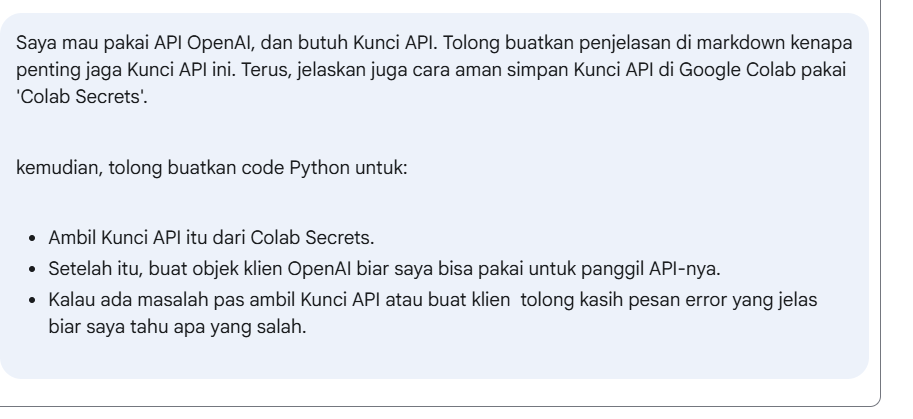

## Manajemen Kunci API

Untuk mengakses layanan API seperti OpenAI, kita memerlukan Kunci API (API Key). Sangat penting untuk mengelola kunci ini dengan aman agar tidak disalahgunakan.

### Metode yang Digunakan: Colab Secrets

Dalam notebook ini, Kunci API OpenAI disimpan menggunakan fitur **Colab Secrets** dengan nama `OPENAI_API_KEY`. Cara ini aman karena:
1.  **Tidak Terlihat di Kode:** Kunci API tidak ditulis secara langsung (hardcoded) di dalam sel kode. Ini berarti jika notebook ini dibagikan, Kunci API saya tidak akan ikut terlihat.
2.  **Penyimpanan Terenkripsi:** Google Colab menyimpan secrets ini secara terenkripsi.
3.  **Akses Terkontrol:** Hanya notebook ini yang memiliki akses ke secret tersebut setelah "Notebook access" dicentang untuk secret spesifik ini.

### Mengapa Hardcoding Kunci API Buruk?

Menulis Kunci API secara langsung di dalam kode (misalnya, `api_key = "sk-..."`) adalah praktik yang sangat buruk dan tidak aman karena:
1.  **Risiko Kebocoran Tinggi:** Jika notebook atau kode sumbernya dibagikan (misalnya, diunggah ke GitHub publik, dikirim via email), Kunci API akan langsung terekspos ke siapa saja yang melihat kode tersebut.
2.  **Penyalahgunaan Akun:** Jika Kunci API jatuh ke tangan yang salah, mereka dapat menggunakannya untuk membuat panggilan API atas nama Anda, yang dapat mengakibatkan tagihan yang tidak diinginkan atau penyalahgunaan layanan.
3.  **Tidak Profesional:** Ini menunjukkan kurangnya pemahaman tentang praktik keamanan dasar dalam pengembangan perangkat lunak.

Oleh karena itu, penggunaan Colab Secrets sangat direkomendasikan untuk menjaga keamanan Kunci API.

In [18]:
# Impor library yang dibutuhkan
from google.colab import userdata
import os
import openai # Untuk OpenAI API

# Mengambil OpenAI API Key dari Colab Secrets
OPENAI_API_KEY_VALUE = None # Inisialisasi variabel
client_openai = None # Inisialisasi variabel

try:
    OPENAI_API_KEY_VALUE = userdata.get('OPENAI_API_KEY') # Pastikan nama secret ini sama ('OPENAI_API_KEY')
    if not OPENAI_API_KEY_VALUE:
        raise ValueError("Nilai OPENAI_API_KEY dari Colab Secrets kosong atau tidak ada.")
    os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY_VALUE # Set sebagai environment variable
    print("✅ OpenAI API Key berhasil diambil dari Colab secrets dan diatur sebagai environment variable.")

    # Inisialisasi klien OpenAI setelah API key berhasil dimuat
    client_openai = openai.OpenAI() # Klien akan otomatis membaca dari os.environ
    print("✅ Klien OpenAI berhasil diinisialisasi.")

except KeyError:
    print("❌ Secret dengan nama 'OPENAI_API_KEY' tidak ditemukan di Colab Secrets.")
    print("   Pastikan Anda sudah menambahkan secret dengan nama yang benar dan mencentang 'Notebook access'.")
except ValueError as ve:
    print(f"⚠️ {ve}")
except Exception as e:
    print(f"❌ Terjadi error tak terduga saat mengambil/menginisialisasi Kunci API OpenAI: {e}")

✅ OpenAI API Key berhasil diambil dari Colab secrets dan diatur sebagai environment variable.
✅ Klien OpenAI berhasil diinisialisasi.


Prompt untuk Fase 2 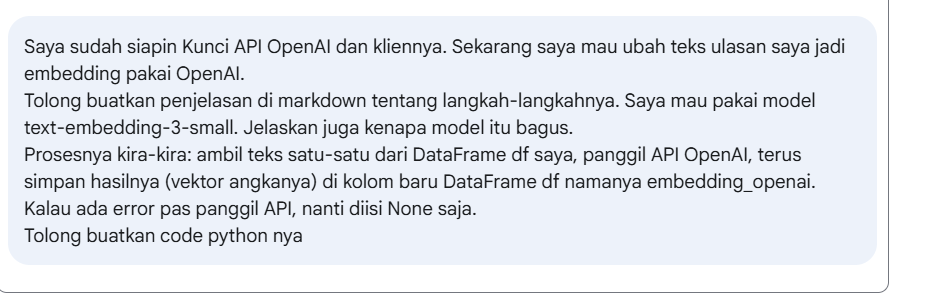

# **Fase 2: Pembuatan Text Embedding**

### 2.1 Menghasilkan Embeddings dengan OpenAI API

Setelah Kunci API OpenAI berhasil dikonfigurasi dengan aman dan klien OpenAI diinisialisasi, langkah selanjutnya adalah menghasilkan *text embeddings* untuk setiap ulasan dalam dataset sintetis (`df`) yang telah dibuat pada Fase 1.

**Model yang Digunakan:**
Saya akan menggunakan model `text-embedding-3-small` dari OpenAI. Model ini dipilih karena menawarkan keseimbangan yang baik antara kualitas embedding, kecepatan, dan efisiensi biaya untuk dataset dengan skala ini.

**Proses Pembuatan Embedding:**
1.  Setiap teks dari kolom 'text' dalam DataFrame `df` akan diambil satu per satu.
2.  Untuk setiap teks, akan dilakukan panggilan ke endpoint `embeddings.create` dari OpenAI API menggunakan model `text-embedding-3-small`. Parameter `encoding_format="float"` akan digunakan untuk memastikan output berupa vektor angka floating-point.
3.  Vektor embedding yang dihasilkan dari API akan diekstrak.
4.  Setiap vektor embedding akan disimpan. Untuk kemudahan analisis selanjutnya, embedding ini akan ditambahkan sebagai kolom baru bernama `embedding_openai` ke dalam DataFrame `df` yang sudah ada.
5.  Proses ini akan menyertakan penanganan error untuk mengantisipasi jika terjadi masalah saat panggilan API untuk teks tertentu. Teks yang gagal diproses akan ditandai atau embedding-nya akan diisi dengan nilai `None`.

In [19]:
import time # Opsional, untuk delay

# Pastikan DataFrame 'df' dari Fase 1 sudah ada
# Pastikan 'client_openai' sudah diinisialisasi dari Blok Kode 2

if 'df' in globals() and client_openai is not None:
    # Ambil list teks dari DataFrame
    # Pastikan tidak ada nilai NaN di kolom 'text', jika ada, isi dengan string kosong atau hapus barisnya
    df['text'] = df['text'].fillna('') # Mengisi NaN dengan string kosong agar tidak error
    texts_to_embed_openai = df['text'].tolist()

    embeddings_openai_list = [] # List untuk menyimpan hasil embedding
    embedding_model_openai = "text-embedding-3-small"

    print(f"\n⚙️ Memulai proses pembuatan embeddings menggunakan model OpenAI: {embedding_model_openai}...")
    print(f"Jumlah teks yang akan diproses: {len(texts_to_embed_openai)}")

    for i, text_content in enumerate(texts_to_embed_openai):
        if (i + 1) % 10 == 0: # Cetak progres setiap 10 teks
            print(f"   Memproses teks ke-{i+1} dari {len(texts_to_embed_openai)}...")

        if not text_content.strip(): # Jika teks kosong setelah di-strip
            # print(f"   Teks ke-{i+1} kosong, menambahkan None untuk embedding.")
            embeddings_openai_list.append(None)
            continue

        try:
            response = client_openai.embeddings.create(
                model=embedding_model_openai,
                input=text_content,
                encoding_format="float"
            )
            embedding = response.data[0].embedding
            embeddings_openai_list.append(embedding)
        except openai.APIError as api_e: # Menangkap error spesifik dari OpenAI
            print(f"   ❌ OpenAI API Error untuk teks ke-{i+1} (\"{text_content[:30]}...\"): {api_e}. Menambahkan None.")
            embeddings_openai_list.append(None)
        except Exception as e: # Menangkap error umum lainnya
            print(f"   ❌ Error tak terduga untuk teks ke-{i+1} (\"{text_content[:30]}...\"): {e}. Menambahkan None.")
            embeddings_openai_list.append(None)

        # time.sleep(0.05) # Delay opsional jika Anda memproses sangat banyak data sekaligus

    # Tambahkan list embeddings sebagai kolom baru ke DataFrame
    df['embedding_openai'] = embeddings_openai_list

    print(f"\n✅ Proses pembuatan embedding OpenAI selesai.")
    print(f"   Jumlah teks yang diproses: {len(texts_to_embed_openai)}")
    successful_embeddings_count = sum(1 for e in embeddings_openai_list if e is not None)
    print(f"   Jumlah embedding yang berhasil dibuat: {successful_embeddings_count}")
    failed_embeddings_count = len(embeddings_openai_list) - successful_embeddings_count
    print(f"   Jumlah embedding yang gagal (diisi None): {failed_embeddings_count}")
    print("   Kolom 'embedding_openai' telah ditambahkan ke DataFrame.")

elif 'df' not in globals():
    print("❌ DataFrame 'df' tidak ditemukan. Pastikan Fase 1 sudah dijalankan.")
else: # client_openai is None
    print("❌ Klien OpenAI tidak terinisialisasi. Tidak dapat melanjutkan pembuatan embedding.")


⚙️ Memulai proses pembuatan embeddings menggunakan model OpenAI: text-embedding-3-small...
Jumlah teks yang akan diproses: 150
   Memproses teks ke-10 dari 150...
   Memproses teks ke-20 dari 150...
   Memproses teks ke-30 dari 150...
   Memproses teks ke-40 dari 150...
   Memproses teks ke-50 dari 150...
   Memproses teks ke-60 dari 150...
   Memproses teks ke-70 dari 150...
   Memproses teks ke-80 dari 150...
   Memproses teks ke-90 dari 150...
   Memproses teks ke-100 dari 150...
   Memproses teks ke-110 dari 150...
   Memproses teks ke-120 dari 150...
   Memproses teks ke-130 dari 150...
   Memproses teks ke-140 dari 150...
   Memproses teks ke-150 dari 150...

✅ Proses pembuatan embedding OpenAI selesai.
   Jumlah teks yang diproses: 150
   Jumlah embedding yang berhasil dibuat: 150
   Jumlah embedding yang gagal (diisi None): 0
   Kolom 'embedding_openai' telah ditambahkan ke DataFrame.


Prompt

 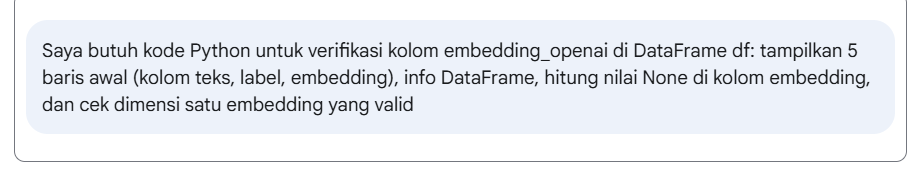

In [20]:
if 'df' in globals() and 'embedding_openai' in df.columns:
    print("\n--- Verifikasi Hasil Embedding OpenAI ---")
    print("Contoh 5 baris pertama DataFrame dengan kolom embedding:")
    print(df[['text', 'label', 'embedding_openai']].head())

    print("\nInformasi DataFrame:")
    df.info(verbose=True, show_counts=True) # verbose=True dan show_counts=True untuk detail

    null_embeddings_count = df['embedding_openai'].isnull().sum()
    print(f"\nJumlah embedding OpenAI yang bernilai None: {null_embeddings_count}")

    # Cek dimensi salah satu embedding yang valid (jika ada)
    first_valid_embedding_series = df['embedding_openai'].dropna()
    if not first_valid_embedding_series.empty:
        first_valid_embedding = first_valid_embedding_series.iloc[0]
        print(f"Dimensi embedding OpenAI (contoh dari embedding pertama yang valid): {len(first_valid_embedding)}")
        # print(f"Tipe data embedding (contoh): {type(first_valid_embedding)}")
        # if isinstance(first_valid_embedding, list):
        #     print(f"Tipe data elemen dalam embedding (contoh): {type(first_valid_embedding[0]) if first_valid_embedding else 'List Kosong'}")
    else:
        print("Tidak ada embedding OpenAI yang valid untuk dicek dimensinya.")
else:
    print("❌ DataFrame 'df' atau kolom 'embedding_openai' tidak ditemukan untuk verifikasi.")


--- Verifikasi Hasil Embedding OpenAI ---
Contoh 5 baris pertama DataFrame dengan kolom embedding:
                                                text                 label  \
0  Kamera iPhone 13 Pro ini benar-benar game chan...  Review iPhone 13 Pro   
1  Upgrade dari iPhone lama ke 13 Pro terasa sign...  Review iPhone 13 Pro   
2  Saya suka hasil foto low-light dari iPhone 13 ...  Review iPhone 13 Pro   
3  Layar Super Retina XDR di iPhone 13 Pro sangat...  Review iPhone 13 Pro   
4  Untuk kebutuhan videografi profesional, iPhone...  Review iPhone 13 Pro   

                                    embedding_openai  
0  [0.004938092, 0.0078101205, -0.04006367, 0.035...  
1  [0.030603508, 0.019540753, -0.011124789, 0.008...  
2  [0.023323884, -0.0015400248, -0.038021665, 0.0...  
3  [0.012832004, 0.03802583, -0.03379421, 0.02711...  
4  [0.0061114687, 0.01774395, -0.029492503, 0.018...  

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data co

Prompt untuk Embeddings dengan Gemini API  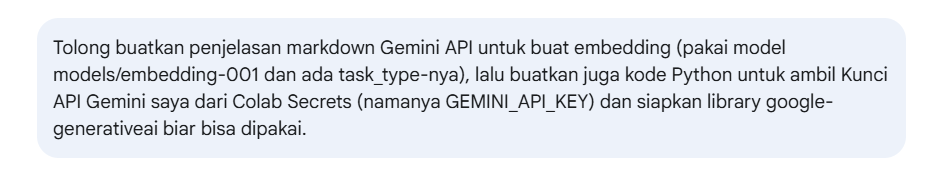

### 2.2 Menghasilkan Embeddings dengan Gemini API

Untuk mendapatkan poin bonus "Teknik Embedding Beragam" dan melakukan perbandingan, saya akan menghasilkan *text embeddings* untuk dataset yang sama menggunakan **Gemini API** dari Google. Ini akan memungkinkan saya untuk membandingkan performa dan karakteristik *embeddings* yang dihasilkan oleh model dari penyedia yang berbeda (OpenAI vs. Google).

**Model yang Digunakan:**
Saya akan menggunakan model embedding dari Gemini API, kemungkinan besar `models/embedding-001` (atau `models/text-embedding-004` jika itu nama yang lebih baru/direkomendasikan, sesuai dokumentasi terbaru). Model ini dirancang untuk menghasilkan representasi vektor berkualitas tinggi yang menangkap makna semantik teks.

**Konsep `task_type` pada Gemini API:**
Salah satu fitur menarik dari Gemini API untuk embeddings adalah parameter `task_type`. Parameter ini memungkinkan kita untuk menghasilkan embeddings yang dioptimalkan untuk tugas spesifik, seperti:
*   `SEMANTIC_SIMILARITY`: Untuk menilai kemiripan teks secara umum.
*   `RETRIEVAL_DOCUMENT`: Untuk mengoptimalkan embedding dokumen yang akan digunakan dalam sistem pencarian (RAG).
*   `RETRIEVAL_QUERY`: Untuk mengoptimalkan embedding query pencarian.
*   `CLASSIFICATION`: Untuk tugas klasifikasi teks.
*   `CLUSTERING`: Untuk tugas pengelompokan teks.

Untuk tugas ini, karena salah satu analisis yang mungkin dilakukan adalah pencarian semantik atau clustering, saya akan mempertimbangkan penggunaan `task_type` seperti `RETRIEVAL_DOCUMENT` atau `SEMANTIC_SIMILARITY`.

**Proses Pembuatan Embedding dengan Gemini API:**
1.  Kunci API Gemini akan diambil dengan aman dari Colab Secrets.
2.  Pustaka `google-generativeai` akan dikonfigurasi dengan Kunci API tersebut.
3.  Setiap teks dari kolom 'text' dalam DataFrame `df` akan diproses.
4.  Fungsi `genai.embed_content()` akan dipanggil untuk setiap teks, dengan menentukan model dan `task_type` yang sesuai.
5.  Vektor embedding yang dihasilkan akan disimpan dalam kolom baru di DataFrame, misalnya `embedding_gemini`.

In [21]:
# Impor library yang dibutuhkan untuk Gemini API
from google.colab import userdata
import google.generativeai as genai # Pustaka resmi Google untuk Gemini

# Mengambil Gemini API Key dari Colab Secrets
GEMINI_API_KEY_VALUE = None # Inisialisasi variabel

try:
    GEMINI_API_KEY_VALUE = userdata.get('GEMINI_API_KEY') # Pastikan nama secret ini sama ('GEMINI_API_KEY')
    if not GEMINI_API_KEY_VALUE:
        raise ValueError("Nilai GEMINI_API_KEY dari Colab Secrets kosong atau tidak ada.")

    genai.configure(api_key=GEMINI_API_KEY_VALUE) # Mengkonfigurasi pustaka dengan kunci API
    print("✅ Kunci API Gemini berhasil diambil dan pustaka google-generativeai telah dikonfigurasi.")

except KeyError:
    print("❌ Secret dengan nama 'GEMINI_API_KEY' tidak ditemukan di Colab Secrets.")
    print("   Pastikan Anda sudah menambahkan secret dengan nama yang benar dan mencentang 'Notebook access'.")
except ValueError as ve:
    print(f"⚠️ {ve}")
except Exception as e:
    print(f"❌ Terjadi error tak terduga saat mengambil/mengkonfigurasi Kunci API Gemini: {e}")

✅ Kunci API Gemini berhasil diambil dan pustaka google-generativeai telah dikonfigurasi.


Prompt untuk Pembuatan Embedding Gemini API & Hasilnya  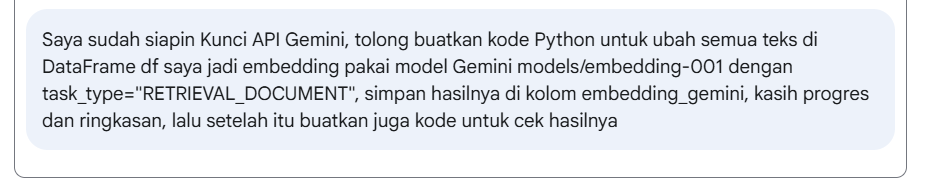

### **Implementasi Pembuatan Embedding Gemini API**

In [22]:
import time # Opsional, untuk delay

# Pastikan DataFrame 'df' dari Fase 1 sudah ada
# Pastikan GEMINI_API_KEY_VALUE sudah terdefinisi dan pustaka genai sudah dikonfigurasi

if 'df' in globals() and GEMINI_API_KEY_VALUE is not None:
    # Ambil list teks dari DataFrame (kolom 'text' sudah dibersihkan dari NaN di langkah OpenAI)
    texts_to_embed_gemini = df['text'].tolist()

    embeddings_gemini_list = [] # List untuk menyimpan hasil embedding
    # Sesuai materi dosen, 'models/embedding-001' adalah pilihan yang baik
    # atau 'models/text-embedding-004' jika itu yang lebih baru. Cek dokumentasi jika ragu.
    embedding_model_gemini = "models/embedding-001"

    # Pilih task_type yang sesuai. Untuk perbandingan umum atau pencarian, RETRIEVAL_DOCUMENT atau SEMANTIC_SIMILARITY bisa jadi pilihan.
    # Jika Anda berencana melakukan clustering, CLUSTERING juga bisa.
    # Untuk contoh ini, kita gunakan RETRIEVAL_DOCUMENT karena sering digunakan untuk membangun korpus dokumen.
    task_type_gemini = "RETRIEVAL_DOCUMENT"

    print(f"\n⚙️ Memulai proses pembuatan embeddings menggunakan model Gemini: {embedding_model_gemini} dengan task_type: {task_type_gemini}...")
    print(f"Jumlah teks yang akan diproses: {len(texts_to_embed_gemini)}")

    for i, text_content in enumerate(texts_to_embed_gemini):
        if (i + 1) % 10 == 0: # Cetak progres setiap 10 teks
            print(f"   Memproses teks ke-{i+1} dari {len(texts_to_embed_gemini)} dengan Gemini...")

        if not text_content.strip(): # Jika teks kosong
            # print(f"   Teks ke-{i+1} kosong, menambahkan None untuk embedding Gemini.")
            embeddings_gemini_list.append(None)
            continue

        try:
            # Panggilan API Gemini untuk embedding
            result = genai.embed_content(
                model=embedding_model_gemini,
                content=text_content,
                task_type=task_type_gemini
            )
            embedding = result['embedding'] # Mengambil vektor embedding dari dictionary hasil
            embeddings_gemini_list.append(embedding)
        except Exception as e: # Menangkap error umum dari API Gemini
            print(f"   ❌ Error untuk teks ke-{i+1} (\"{text_content[:30]}...\") dengan Gemini: {e}. Menambahkan None.")
            embeddings_gemini_list.append(None)

        # time.sleep(0.1) # Gemini API mungkin memiliki rate limit yang berbeda, sesuaikan jika perlu

    # Tambahkan list embeddings sebagai kolom baru ke DataFrame
    df['embedding_gemini'] = embeddings_gemini_list

    print(f"\n✅ Proses pembuatan embedding Gemini selesai.")
    print(f"   Jumlah teks yang diproses: {len(texts_to_embed_gemini)}")
    successful_gemini_embeddings_count = sum(1 for e in embeddings_gemini_list if e is not None)
    print(f"   Jumlah embedding Gemini yang berhasil dibuat: {successful_gemini_embeddings_count}")
    failed_gemini_embeddings_count = len(embeddings_gemini_list) - successful_gemini_embeddings_count
    print(f"   Jumlah embedding Gemini yang gagal (diisi None): {failed_gemini_embeddings_count}")
    print("   Kolom 'embedding_gemini' telah ditambahkan ke DataFrame.")

elif 'df' not in globals():
    print("❌ DataFrame 'df' tidak ditemukan. Pastikan Fase 1 sudah dijalankan.")
else: # GEMINI_API_KEY_VALUE is None
    print("❌ Kunci API Gemini tidak terkonfigurasi. Tidak dapat melanjutkan pembuatan embedding Gemini.")


⚙️ Memulai proses pembuatan embeddings menggunakan model Gemini: models/embedding-001 dengan task_type: RETRIEVAL_DOCUMENT...
Jumlah teks yang akan diproses: 150
   Memproses teks ke-10 dari 150 dengan Gemini...
   Memproses teks ke-20 dari 150 dengan Gemini...
   Memproses teks ke-30 dari 150 dengan Gemini...
   Memproses teks ke-40 dari 150 dengan Gemini...
   Memproses teks ke-50 dari 150 dengan Gemini...
   Memproses teks ke-60 dari 150 dengan Gemini...
   Memproses teks ke-70 dari 150 dengan Gemini...
   Memproses teks ke-80 dari 150 dengan Gemini...
   Memproses teks ke-90 dari 150 dengan Gemini...
   Memproses teks ke-100 dari 150 dengan Gemini...
   Memproses teks ke-110 dari 150 dengan Gemini...
   Memproses teks ke-120 dari 150 dengan Gemini...
   Memproses teks ke-130 dari 150 dengan Gemini...
   Memproses teks ke-140 dari 150 dengan Gemini...
   Memproses teks ke-150 dari 150 dengan Gemini...

✅ Proses pembuatan embedding Gemini selesai.
   Jumlah teks yang diproses: 150
 

### **Verifikasi Hasil Embedding Gemini**

In [23]:
if 'df' in globals() and 'embedding_gemini' in df.columns:
    print("\n--- Verifikasi Hasil Embedding Gemini ---")
    print("Contoh 5 baris pertama DataFrame dengan kolom embedding Gemini:")
    # Menampilkan kolom relevan termasuk embedding OpenAI untuk perbandingan sekilas
    print(df[['text', 'label', 'embedding_openai', 'embedding_gemini']].head())

    print("\nInformasi DataFrame (setelah penambahan embedding Gemini):")
    df.info(verbose=True, show_counts=True)

    null_gemini_embeddings_count = df['embedding_gemini'].isnull().sum()
    print(f"\nJumlah embedding Gemini yang bernilai None: {null_gemini_embeddings_count}")

    # Cek dimensi salah satu embedding Gemini yang valid (jika ada)
    first_valid_gemini_embedding_series = df['embedding_gemini'].dropna()
    if not first_valid_gemini_embedding_series.empty:
        first_valid_gemini_embedding = first_valid_gemini_embedding_series.iloc[0]
        print(f"Dimensi embedding Gemini (contoh dari embedding pertama yang valid): {len(first_valid_gemini_embedding)}")
        # print(f"Tipe data embedding Gemini (contoh): {type(first_valid_gemini_embedding)}")
        # if isinstance(first_valid_gemini_embedding, list):
        #     print(f"Tipe data elemen dalam embedding Gemini (contoh): {type(first_valid_gemini_embedding[0]) if first_valid_gemini_embedding else 'List Kosong'}")
    else:
        print("Tidak ada embedding Gemini yang valid untuk dicek dimensinya.")
else:
    print("❌ DataFrame 'df' atau kolom 'embedding_gemini' tidak ditemukan untuk verifikasi.")


--- Verifikasi Hasil Embedding Gemini ---
Contoh 5 baris pertama DataFrame dengan kolom embedding Gemini:
                                                text                 label  \
0  Kamera iPhone 13 Pro ini benar-benar game chan...  Review iPhone 13 Pro   
1  Upgrade dari iPhone lama ke 13 Pro terasa sign...  Review iPhone 13 Pro   
2  Saya suka hasil foto low-light dari iPhone 13 ...  Review iPhone 13 Pro   
3  Layar Super Retina XDR di iPhone 13 Pro sangat...  Review iPhone 13 Pro   
4  Untuk kebutuhan videografi profesional, iPhone...  Review iPhone 13 Pro   

                                    embedding_openai  \
0  [0.004938092, 0.0078101205, -0.04006367, 0.035...   
1  [0.030603508, 0.019540753, -0.011124789, 0.008...   
2  [0.023323884, -0.0015400248, -0.038021665, 0.0...   
3  [0.012832004, 0.03802583, -0.03379421, 0.02711...   
4  [0.0061114687, 0.01774395, -0.029492503, 0.018...   

                                    embedding_gemini  
0  [0.024745975, 0.0033726224, -

Prompt untuk Fase 3: Embedding dengan Open AI 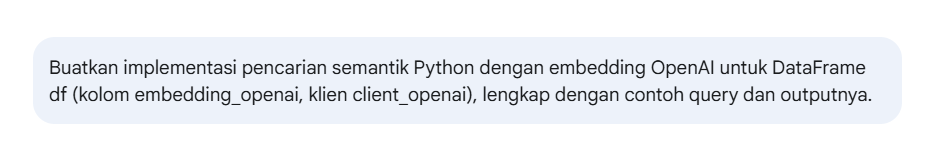

# **Fase 3: Analisis Embedding**

Setelah berhasil menghasilkan dua set *text embeddings* untuk dataset sintetis kita (menggunakan OpenAI API dan Gemini API), langkah selanjutnya adalah melakukan analisis terhadap *embeddings* tersebut.
- Fase ini bertujuan untuk menunjukkan bagaimana *embeddings* dapat digunakan untuk tugas-tugas NLP praktis dan untuk membandingkan performa dari kedua jenis *embeddings* yang telah dibuat.

Analisis yang akan dilakukan meliputi:
1.  **Pencarian Semantik (Smart Search):**
    *   Sebagai analisis inti, kita akan mengimplementasikan sistem pencarian semantik menggunakan *embeddings* yang dihasilkan oleh **OpenAI API**.
    *   Kemudian, untuk tujuan perbandingan (bagian dari bonus "Teknik Embedding Beragam"), sistem pencarian semantik yang sama akan diimplementasikan menggunakan *embeddings* dari **Gemini API**.
    *   Hasil dari kedua sistem akan dibandingkan untuk *query* yang sama.
2.  **Clustering dengan Visualisasi t-SNE (Analisis Tambahan untuk Bonus):**
    *   Sebagai analisis tambahan untuk bonus "Analisis Berganda", kita akan menerapkan algoritma clustering (K-Means) pada *embeddings* **OpenAI API**.
    *   Hasil clustering akan divisualisasikan menggunakan t-SNE untuk melihat bagaimana teks-teks dikelompokkan dalam ruang 2D dan apakah pengelompokan tersebut sesuai dengan label sintetis asli.
    *   (Opsional lebih lanjut) Proses clustering dan visualisasi yang sama dapat diulang untuk *embeddings* **Gemini API** untuk perbandingan lebih mendalam.

Metrik utama yang akan digunakan untuk pencarian semantik adalah **Cosine Similarity**, yang mengukur kesamaan orientasi antara dua vektor embedding. Semakin tinggi skor cosine similarity (mendekati 1), semakin mirip makna semantik antara dua teks tersebut.

### 3.1 Pencarian Semantik (Smart Search)

Pencarian semantik bertujuan untuk menemukan dokumen atau teks dalam korpus yang paling relevan secara makna dengan *query* yang diberikan pengguna, bukan hanya berdasarkan pencocokan kata kunci (keyword matching). Ini dimungkinkan dengan merepresentasikan baik *query* maupun dokumen dalam korpus sebagai *embeddings* dan kemudian menghitung kemiripan antar *embeddings* tersebut.

**Langkah-langkah Implementasi:**
1.  **Fungsi untuk Menghasilkan Embedding Query:** Membuat fungsi yang menerima teks *query* dan menghasilkan vektor *embedding*-nya menggunakan model yang sesuai (OpenAI atau Gemini).
2.  **Fungsi untuk Menghitung Cosine Similarity:** Menggunakan `cosine_similarity` dari `sklearn.metrics.pairwise` untuk menghitung kemiripan antara *embedding query* dan semua *embeddings* dalam dataset.
3.  **Fungsi Pencarian:** Menggabungkan langkah 1 dan 2 untuk menerima *query*, menghitung kemiripan dengan semua teks di dataset, mengurutkan hasilnya, dan menampilkan N teks teratas yang paling mirip beserta skor kemiripannya.

### **Implementasi Pencarian Semantik dengan Embedding OpenAI**

In [24]:
# Blok Kode 12

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd # Pastikan pandas sudah diimpor
import openai # Pastikan openai sudah diimpor dan client_openai sudah diinisialisasi

# --- Fungsi Helper untuk Mendapatkan Embedding Query OpenAI ---
def get_query_embedding_openai(query_text, client, model="text-embedding-3-small"):
    """Menghasilkan embedding untuk teks query menggunakan OpenAI API."""
    if not query_text.strip():
        print("DEBUG: Query text kosong.")
        return None
    if client is None:
        print("DEBUG: Klien OpenAI adalah None.")
        return None
    try:
        response = client.embeddings.create(
            model=model,
            input=query_text,
            encoding_format="float"
        )
        return response.data[0].embedding
    except openai.APIError as api_e: # Menangkap error spesifik dari OpenAI
        print(f"DEBUG: OpenAI API Error saat membuat embedding query: {api_e}")
        return None
    except Exception as e:
        print(f"DEBUG: Error umum saat membuat embedding query OpenAI: {e}")
        return None

# --- Fungsi Pencarian Semantik Utama dengan Embedding OpenAI ---
def semantic_search_openai_revised(query_text, dataframe, client, top_n=5, embedding_column_name='embedding_openai'):
    """
    Melakukan pencarian semantik menggunakan embedding OpenAI dengan penanganan error yang lebih baik.
    """
    print(f"\n--- Memulai Pencarian Semantik untuk Query: \"{query_text}\" ---")

    # 1. Validasi Input
    if not isinstance(dataframe, pd.DataFrame):
        print("❌ Error: Input 'dataframe' bukan merupakan Pandas DataFrame.")
        return None
    if embedding_column_name not in dataframe.columns:
        print(f"❌ Error: Kolom embedding '{embedding_column_name}' tidak ditemukan di DataFrame.")
        return None
    if client is None:
        print("❌ Error: Klien OpenAI (client) belum diinisialisasi.")
        return None
    if not query_text.strip():
        print("❌ Error: Teks query tidak boleh kosong.")
        return None

    # 2. Persiapan DataFrame Korpus
    df_searchable = dataframe[dataframe[embedding_column_name].notna()].copy()
    df_searchable = df_searchable[df_searchable[embedding_column_name].apply(lambda x: isinstance(x, (list, np.ndarray)))]

    if df_searchable.empty:
        print("ℹ️ Info: Tidak ada data dengan embedding yang valid di DataFrame untuk dilakukan pencarian.")
        return pd.DataFrame()

    try:
        corpus_embeddings = np.array(df_searchable[embedding_column_name].tolist())
        if corpus_embeddings.ndim == 1 and len(corpus_embeddings) > 0:
            print("⚠️ Peringatan: Dimensi corpus_embeddings tidak seragam. Memeriksa integritas data embedding...")
            first_valid_embedding_series = df_searchable[embedding_column_name].dropna()
            if not first_valid_embedding_series.empty:
                first_valid_dim = len(first_valid_embedding_series.iloc[0])
                valid_indices = df_searchable[embedding_column_name].apply(lambda x: isinstance(x, (list, np.ndarray)) and len(x) == first_valid_dim)
                df_searchable = df_searchable[valid_indices]
                if df_searchable.empty:
                    print("ℹ️ Info: Tidak ada data dengan embedding yang valid dan seragam setelah pemeriksaan dimensi.")
                    return pd.DataFrame()
                corpus_embeddings = np.array(df_searchable[embedding_column_name].tolist())
            else:
                print("ℹ️ Info: Tidak ada embedding valid di korpus setelah filter awal.")
                return pd.DataFrame()

        if corpus_embeddings.shape[0] == 0:
             print("ℹ️ Info: Tidak ada embedding valid di korpus setelah filter lanjutan.")
             return pd.DataFrame()

    except Exception as e:
        print(f"❌ Error saat mengkonversi corpus embeddings ke NumPy array: {e}")
        return None

    print(f"Jumlah dokumen dalam korpus yang valid untuk pencarian: {corpus_embeddings.shape[0]}")

    # 3. Dapatkan Embedding untuk Query
    print(f"Membuat embedding untuk query: \"{query_text}\"...")
    query_embedding = get_query_embedding_openai(query_text, client) # Panggil fungsi helper yang sudah didefinisikan

    if query_embedding is None:
        print(f"❌ Gagal membuat embedding untuk query: \"{query_text}\". Pencarian dihentikan.")
        return None

    print(f"Embedding query berhasil dibuat. Dimensi: {len(query_embedding)}")
    query_embedding_reshaped = np.array(query_embedding).reshape(1, -1)

    # 4. Hitung Cosine Similarity
    try:
        similarities = cosine_similarity(query_embedding_reshaped, corpus_embeddings)
    except ValueError as ve:
        print(f"❌ ValueError saat menghitung cosine similarity: {ve}")
        print(f"   Dimensi query embedding: {query_embedding_reshaped.shape}")
        print(f"   Dimensi corpus embeddings: {corpus_embeddings.shape}")
        return None
    except Exception as e:
        print(f"❌ Error saat menghitung cosine similarity: {e}")
        return None

    # 5. Proses Hasil
    df_searchable['similarity_score'] = similarities[0]
    results_df = df_searchable.sort_values(by='similarity_score', ascending=False).head(top_n)

    print(f"Pencarian selesai. Menampilkan {min(top_n, len(results_df))} hasil teratas.")
    return results_df[['text', 'label', 'similarity_score']]

# --- Contoh Penggunaan Pencarian Semantik dengan OpenAI ---

# Pastikan 'df' sudah ada dari Fase 1
# Pastikan 'client_openai' sudah diinisialisasi dari Blok Kode 2 (Manajemen Kunci API OpenAI)

if 'df' in globals() and 'client_openai' in globals() and client_openai is not None and 'embedding_openai' in df.columns:
    print("\n--- Contoh Pencarian Semantik dengan Embedding OpenAI (Revisi) ---")

    queries_to_test = [
        "ponsel dengan kamera terbaik dan baterai awet",
        "film romantis Indonesia tentang cinta pertama di sekolah",
        "belajar konsep sulit jadi mudah dengan teknologi",
        "buku sihir tentang persahabatan dan petualangan",
        "kemampuan AI dalam memahami bahasa manusia",
        "ulasan positif tentang iPhone",
        "kritik untuk film AADC"
    ]

    all_search_results_openai = {}

    for i, query in enumerate(queries_to_test):
        search_results = semantic_search_openai_revised(query, df, client_openai, top_n=3, embedding_column_name='embedding_openai')

        if search_results is not None:
            if not search_results.empty:
                print("\nQuery:", query)
                print("Hasil Pencarian Teratas (OpenAI):")
                print(search_results.to_string())
                all_search_results_openai[query] = search_results
            else:
                print("\nQuery:", query)
                print("Tidak ada hasil yang relevan ditemukan.")
                all_search_results_openai[query] = pd.DataFrame()
        else:
            print("\nQuery:", query)
            print("Pencarian gagal atau terjadi error internal.")
            all_search_results_openai[query] = None
        print("-" * 50)
else:
    print("\n❌ Tidak dapat menjalankan pencarian semantik OpenAI.")
    if 'df' not in globals():
        print("   DataFrame 'df' tidak ditemukan.")
    if 'client_openai' not in globals() or client_openai is None:
        print("   Klien OpenAI ('client_openai') belum diinisialisasi.")
    if 'df' in globals() and 'embedding_openai' not in df.columns: # Cek df dulu sebelum cek kolom
        print("   Kolom 'embedding_openai' tidak ditemukan di DataFrame.")
    elif 'df' not in globals(): # Jika df tidak ada, kolom juga pasti tidak ada
        print("   Kolom 'embedding_openai' tidak ditemukan karena DataFrame 'df' juga tidak ditemukan.")


--- Contoh Pencarian Semantik dengan Embedding OpenAI (Revisi) ---

--- Memulai Pencarian Semantik untuk Query: "ponsel dengan kamera terbaik dan baterai awet" ---
Jumlah dokumen dalam korpus yang valid untuk pencarian: 150
Membuat embedding untuk query: "ponsel dengan kamera terbaik dan baterai awet"...
Embedding query berhasil dibuat. Dimensi: 1536
Pencarian selesai. Menampilkan 3 hasil teratas.

Query: ponsel dengan kamera terbaik dan baterai awet
Hasil Pencarian Teratas (OpenAI):
                                                                                                                                                                                                                text                 label  similarity_score
11                  Bagi pengguna yang mencari ponsel dengan kamera serbaguna dan performa tinggi, iPhone 13 Pro adalah jawabannya. Mode Sinematik sangat menyenangkan untuk dicoba. Daya tahan baterainya juga oke.  Review iPhone 13 Pro          0.589289
13  

#### Diskusi Hasil Pencarian Semantik (OpenAI)

Hasil implementasi pencarian semantik menggunakan *embeddings* dari OpenAI API (`text-embedding-3-small`) menunjukkan kemampuan yang sangat baik dalam menangkap relevansi makna antara *query* dan teks dalam dataset ulasan kita.

- Pada *query* seperti **"ponsel dengan kamera terbaik dan baterai awet"**, sistem berhasil mengidentifikasi ulasan-ulasan iPhone 13 Pro yang secara eksplisit atau implisit membahas kualitas kamera dan daya tahan baterai. Teks hasil teratas (indeks 11) dengan skor kemiripan 0.589 secara langsung menyebutkan "kamera serbaguna" dan "Daya tahan baterainya juga oke", yang sangat sesuai dengan *query*. Ini menunjukkan bahwa *embedding* OpenAI mampu memahami konsep "kamera terbaik" dan "baterai awet" dan mencocokkannya dengan deskripsi fitur dalam ulasan.

- Pada *query* **"film romantis Indonesia tentang cinta pertama di sekolah"**, semua hasil teratas adalah ulasan untuk film "AADC" dengan skor kemiripan yang cukup tinggi (tertinggi 0.573). Ini sangat akurat, mengingat AADC adalah ikon film dengan tema tersebut. Hal ini menandakan *embedding* dapat mengasosiasikan kata kunci seperti "film romantis Indonesia", "cinta pertama", dan "sekolah" dengan konten ulasan AADC.

- Pada *query* **"belajar konsep sulit jadi mudah dengan teknologi"**, hasil pencarian didominasi oleh ulasan "Kacamata AR untuk belajar", yang sangat relevan. Menariknya, ulasan "Google Gemini" juga muncul sebagai hasil ketiga dengan skor 0.469. Ini bisa jadi karena Gemini sebagai AI canggih juga dianggap sebagai teknologi yang dapat membantu pemahaman dan pembelajaran, menunjukkan kemampuan *embedding* untuk menangkap hubungan semantik yang lebih luas.

- Pada *query* **"buku sihir tentang persahabatan dan petualangan"** secara konsisten menghasilkan ulasan "Novel Harry Potter" dengan skor kemiripan yang baik (tertinggi 0.535). Ini menunjukkan pemahaman yang kuat terhadap genre dan tema utama dari novel tersebut.

- Demikian pula, pada *query* **"kemampuan AI dalam memahami bahasa manusia"** dengan tepat menghasilkan ulasan "Google Gemini", yang merupakan model AI bahasa. Skor kemiripan yang relatif tinggi (tertinggi 0.565) mengindikasikan bahwa *embedding* berhasil mengidentifikasi topik inti dari ulasan Gemini.

Query tambahan seperti **"ulasan positif tentang iPhone"** juga memberikan hasil yang sangat relevan, dengan skor kemiripan yang bahkan lebih tinggi (tertinggi 0.605). Ini mungkin karena *query* lebih langsung dan spesifik terhadap sentimen dan produk. Sebaliknya, *query* **"kritik untuk film AADC"** menghasilkan ulasan AADC yang secara umum positif atau membahas kualitasnya secara keseluruhan, bukan kritik negatif spesifik. Ini bisa jadi karena dataset ulasan AADC kita mungkin tidak banyak mengandung kritik eksplisit, atau *embedding* lebih menangkap topik "AADC" daripada sentimen "kritik" dalam konteks ini. Skor kemiripan yang tinggi (tertinggi 0.688) pada *query* ini menarik, mungkin karena kata "kritik" sendiri memiliki asosiasi kuat dengan "ulasan film" secara umum dalam ruang *embedding*.

Secara keseluruhan, *embedding* OpenAI terbukti efektif dalam pencarian semantik pada dataset ini. Skor kemiripan yang dihasilkan memberikan indikasi yang baik tentang relevansi, dan sistem mampu melampaui pencocokan kata kunci sederhana untuk menemukan teks yang benar-benar bermakna serupa.

Prompt untuk Implementasi Pencarian Semantik dengan Embedding Gemini (untuk Perbandingan) 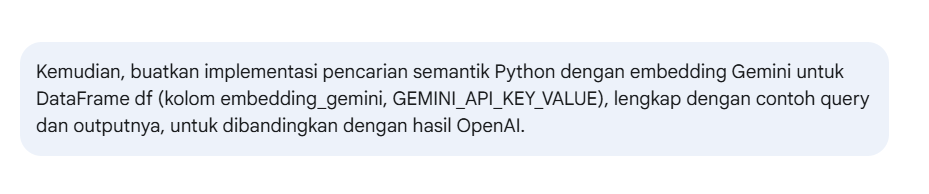

### **Implementasi Pencarian Semantik dengan Embedding Gemini (untuk Perbandingan)**

In [25]:
# Blok Kode 14 (Lengkap dengan Debugging pada 'else')

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd # Pastikan pandas sudah diimpor
# Pustaka genai seharusnya sudah diimpor dan dikonfigurasi di Blok Kode 7
# import google.generativeai as genai

# --- Fungsi Helper (Pastikan ini sudah didefinisikan di atas atau di sel ini) ---
def get_query_embedding_gemini(query_text, model="models/embedding-001", task_type="RETRIEVAL_QUERY"):
    """Menghasilkan embedding untuk teks query menggunakan Gemini API."""
    # Pastikan GEMINI_API_KEY_VALUE ada di scope global atau dilewatkan sebagai argumen jika perlu
    if 'GEMINI_API_KEY_VALUE' not in globals() or GEMINI_API_KEY_VALUE is None:
        print("DEBUG: GEMINI_API_KEY_VALUE tidak tersedia di get_query_embedding_gemini.")
        return None
    if not query_text.strip():
        print("DEBUG: Teks query kosong di get_query_embedding_gemini.")
        return None
    try:
        result = genai.embed_content(
            model=model,
            content=query_text,
            task_type=task_type
        )
        return result['embedding']
    except Exception as e:
        print(f"DEBUG: Error saat membuat embedding query Gemini: {e}")
        return None

# --- Fungsi Pencarian Semantik Utama ---
def semantic_search_gemini(query_text, dataframe, top_n=5, embedding_column_name='embedding_gemini'):
    """Melakukan pencarian semantik menggunakan embedding Gemini."""
    print(f"\n--- Memulai Pencarian Semantik (Gemini) untuk Query: \"{query_text}\" ---")

    # 1. Validasi Input Dasar
    if not isinstance(dataframe, pd.DataFrame):
        print("❌ Error: Input 'dataframe' bukan merupakan Pandas DataFrame.")
        return None
    if embedding_column_name not in dataframe.columns:
        print(f"❌ Error: Kolom embedding '{embedding_column_name}' tidak ditemukan di DataFrame.")
        return None
    # Cek GEMINI_API_KEY_VALUE di scope global (diasumsikan sudah di-set)
    if 'GEMINI_API_KEY_VALUE' not in globals() or GEMINI_API_KEY_VALUE is None:
         print("❌ Error: Kunci API Gemini (GEMINI_API_KEY_VALUE) belum dikonfigurasi atau tidak tersedia.")
         return None
    if not query_text.strip():
        print("❌ Error: Teks query tidak boleh kosong.")
        return None

    # 2. Persiapan DataFrame Korpus
    df_searchable_gemini = dataframe[dataframe[embedding_column_name].notna()].copy()
    df_searchable_gemini = df_searchable_gemini[df_searchable_gemini[embedding_column_name].apply(lambda x: isinstance(x, (list, np.ndarray)))]

    if df_searchable_gemini.empty:
        print("ℹ️ Info: Tidak ada data dengan embedding Gemini yang valid untuk dicari.")
        return pd.DataFrame() # Kembalikan DataFrame kosong

    try:
        corpus_embeddings = np.array(df_searchable_gemini[embedding_column_name].tolist())
        # Pemeriksaan dimensi seragam (jika perlu)
        if corpus_embeddings.ndim == 1 and len(corpus_embeddings) > 0: # Jika hasilnya array 1D objek
            print("⚠️ Peringatan: Dimensi corpus_embeddings (Gemini) tidak seragam. Memeriksa integritas...")
            # Coba filter lagi, pastikan semua embedding punya panjang yang sama dengan embedding pertama yang valid
            # Ini mengasumsikan semua embedding valid memiliki dimensi yang sama (misal 768 untuk embedding-001)
            first_valid_embedding_series = df_searchable_gemini[embedding_column_name].dropna()
            if not first_valid_embedding_series.empty:
                first_valid_dim_gemini = len(first_valid_embedding_series.iloc[0])
                valid_indices_gemini = df_searchable_gemini[embedding_column_name].apply(lambda x: isinstance(x, (list, np.ndarray)) and len(x) == first_valid_dim_gemini)
                df_searchable_gemini = df_searchable_gemini[valid_indices_gemini]
                if df_searchable_gemini.empty:
                    print("ℹ️ Info: Tidak ada data (Gemini) dengan embedding yang valid & seragam setelah pemeriksaan dimensi.")
                    return pd.DataFrame()
                corpus_embeddings = np.array(df_searchable_gemini[embedding_column_name].tolist())
            else: # Tidak ada embedding valid sama sekali
                 print("ℹ️ Info: Tidak ada embedding valid (Gemini) di korpus setelah filter awal.")
                 return pd.DataFrame()

        if corpus_embeddings.shape[0] == 0:
             print("ℹ️ Info: Tidak ada embedding valid (Gemini) di korpus setelah filter lanjutan.")
             return pd.DataFrame()
    except Exception as e:
        print(f"❌ Error saat mengkonversi corpus embeddings Gemini ke NumPy array: {e}")
        return None # Kembalikan None jika ada error konversi fundamental

    print(f"Jumlah dokumen dalam korpus (Gemini) yang valid untuk pencarian: {corpus_embeddings.shape[0]}")

    # 3. Dapatkan Embedding untuk Query
    print(f"Membuat embedding untuk query (Gemini): \"{query_text}\"...")
    query_embedding = get_query_embedding_gemini(query_text, task_type="RETRIEVAL_QUERY")

    if query_embedding is None:
        print(f"❌ Gagal membuat embedding untuk query (Gemini): \"{query_text}\". Pencarian dihentikan.")
        return None # Kembalikan None jika query embedding gagal

    print(f"Embedding query (Gemini) berhasil dibuat. Dimensi: {len(query_embedding)}")
    query_embedding_reshaped = np.array(query_embedding).reshape(1, -1)

    # 4. Hitung Cosine Similarity
    try:
        similarities = cosine_similarity(query_embedding_reshaped, corpus_embeddings)
    except ValueError as ve:
        print(f"❌ ValueError saat menghitung cosine similarity (Gemini): {ve}")
        print(f"   Dimensi query embedding (Gemini): {query_embedding_reshaped.shape}")
        print(f"   Dimensi corpus embeddings (Gemini): {corpus_embeddings.shape}")
        return None
    except Exception as e:
        print(f"❌ Error saat menghitung cosine similarity (Gemini): {e}")
        return None

    # 5. Proses Hasil
    df_searchable_gemini['similarity_score_gemini'] = similarities[0]
    results_df_gemini = df_searchable_gemini.sort_values(by='similarity_score_gemini', ascending=False).head(top_n)

    print(f"Pencarian (Gemini) selesai. Menampilkan {min(top_n, len(results_df_gemini))} hasil teratas.")
    return results_df_gemini[['text', 'label', 'similarity_score_gemini']]


# --- Contoh Penggunaan Pencarian Semantik dengan Gemini (untuk Perbandingan) ---
# Pastikan variabel GEMINI_API_KEY_VALUE sudah didefinisikan dan tidak None dari Blok Kode 7
if 'df' in globals() and ('GEMINI_API_KEY_VALUE' in globals() and GEMINI_API_KEY_VALUE is not None) and 'embedding_gemini' in df.columns:
    print("\n\n--- Contoh Pencarian Semantik dengan Embedding Gemini (untuk Perbandingan) ---")

    queries_for_comparison = [
        "ponsel dengan kamera terbaik dan baterai awet",
        "film romantis Indonesia tentang cinta pertama di sekolah",
        "belajar konsep sulit jadi mudah dengan teknologi",
        "buku sihir tentang persahabatan dan petualangan",
        "kemampuan AI dalam memahami bahasa manusia",
        "ulasan positif tentang iPhone",
        "kritik untuk film AADC"
    ]

    all_search_results_gemini = {} # Untuk menyimpan hasil

    for i, query in enumerate(queries_for_comparison):
        # Panggil fungsi pencarian yang sudah direvisi
        search_results_gemini = semantic_search_gemini(query, df, top_n=3, embedding_column_name='embedding_gemini')

        if search_results_gemini is not None:
            if not search_results_gemini.empty:
                print("\nQuery:", query)
                print("Hasil Pencarian Teratas (Gemini):")
                print(search_results_gemini.to_string()) # Menggunakan to_string() untuk output log yang stabil
                all_search_results_gemini[query] = search_results_gemini
            else:
                print("\nQuery:", query)
                print("Tidak ada hasil yang relevan ditemukan (Gemini).")
                all_search_results_gemini[query] = pd.DataFrame() # Simpan DataFrame kosong
        else:
            # Pesan error lebih detail akan dicetak dari dalam fungsi semantic_search_gemini
            print("\nQuery:", query)
            print("Pencarian (Gemini) gagal atau terjadi error internal (lihat pesan di atas).")
            all_search_results_gemini[query] = None # Tandai sebagai gagal
        print("-" * 50) # Pemisah antar query
else:
    # Bagian else yang sudah dimodifikasi untuk debugging
    print("\n❌ Tidak dapat menjalankan pencarian semantik Gemini karena salah satu kondisi berikut tidak terpenuhi:")
    if 'df' not in globals():
        print("   - DataFrame 'df' tidak ditemukan (belum diinisialisasi atau terhapus). Harap jalankan sel Fase 1.")
    if 'GEMINI_API_KEY_VALUE' not in globals() or GEMINI_API_KEY_VALUE is None:
        print("   - Variabel 'GEMINI_API_KEY_VALUE' tidak ada atau bernilai None. Harap jalankan sel Blok Kode 7 (Konfigurasi API Gemini).")
    # Perlu dicek apakah df ada dulu sebelum cek kolomnya
    if 'df' in globals() and 'embedding_gemini' not in df.columns:
        print("   - Kolom 'embedding_gemini' tidak ditemukan di DataFrame 'df'. Harap jalankan sel Blok Kode 8 (Pembuatan Embedding Gemini) dan Blok Kode 9 (Verifikasi).")
    elif 'df' not in globals() and 'embedding_gemini' not in df.columns: # Jika df tidak ada, kolom juga pasti tidak ada
        print("   - Kolom 'embedding_gemini' tidak ditemukan karena DataFrame 'df' juga tidak ditemukan.")



--- Contoh Pencarian Semantik dengan Embedding Gemini (untuk Perbandingan) ---

--- Memulai Pencarian Semantik (Gemini) untuk Query: "ponsel dengan kamera terbaik dan baterai awet" ---
Jumlah dokumen dalam korpus (Gemini) yang valid untuk pencarian: 150
Membuat embedding untuk query (Gemini): "ponsel dengan kamera terbaik dan baterai awet"...
Embedding query (Gemini) berhasil dibuat. Dimensi: 768
Pencarian (Gemini) selesai. Menampilkan 3 hasil teratas.

Query: ponsel dengan kamera terbaik dan baterai awet
Hasil Pencarian Teratas (Gemini):
                                                                                                                                                                                                text                 label  similarity_score_gemini
11  Bagi pengguna yang mencari ponsel dengan kamera serbaguna dan performa tinggi, iPhone 13 Pro adalah jawabannya. Mode Sinematik sangat menyenangkan untuk dicoba. Daya tahan baterainya juga oke.  Review iPho

### 3.2 Diskusi Perbandingan Hasil Pencarian Semantik (OpenAI vs Gemini)

Perbandingan hasil pencarian semantik antara *embeddings* OpenAI (`text-embedding-3-small`, dimensi 1536) dan Gemini (`models/embedding-001` dengan `task_type` dioptimalkan untuk retrieval, dimensi 768) pada dataset ulasan ini mengungkapkan perbedaan menarik dalam karakteristik performa dan sensitivitas model.

**1. Query: "ponsel dengan kamera terbaik dan baterai awet"**
*   **Observasi:** Kedua model berhasil mengidentifikasi ulasan iPhone 13 Pro sebagai yang paling relevan, dengan teks indeks 11 muncul sebagai hasil teratas untuk keduanya. Namun, Gemini memberikan skor kemiripan yang jauh lebih tinggi (OpenAI: ~0.589 vs Gemini: ~0.724 untuk teks indeks 11). Peringkat kedua dan ketiga juga diisi oleh ulasan iPhone yang relevan, meskipun dengan teks spesifik yang berbeda (OpenAI: indeks 13 & 25; Gemini: indeks 24 & 14).
*   **Analisis:** Skor yang lebih tinggi dari Gemini mungkin mengindikasikan "keyakinan" yang lebih besar dari model tersebut terhadap relevansi hasil, yang bisa jadi merupakan efek dari `task_type="RETRIEVAL_QUERY"` yang secara eksplisit mengoptimalkan *embedding query* untuk pencarian. Perbedaan pada hasil peringkat bawah menunjukkan bahwa meskipun topik utamanya sama (iPhone), kedua model mungkin memberikan bobot yang berbeda pada aspek spesifik seperti "kamera" vs "baterai" atau frasa lain dalam *query* dan teks.

**2. Query: "film romantis Indonesia tentang cinta pertama di sekolah"**
*   **Observasi:** Kedua model sangat akurat, dengan teks indeks 31 dan 30 (ulasan AADC) muncul di dua peringkat teratas. Gemini kembali memberikan skor kemiripan yang lebih tinggi (misalnya, indeks 31: OpenAI ~0.573 vs Gemini ~0.741). Hasil ketiga Gemini (indeks 53) adalah ulasan AADC yang berbeda dari hasil ketiga OpenAI (indeks 35), keduanya tetap relevan.
*   **Analisis:** Keberhasilan kedua model menunjukkan pemahaman yang baik terhadap entitas bernama ("AADC") dan deskriptor genre/tema. Skor Gemini yang lebih tinggi mungkin lagi-lagi dipengaruhi oleh optimalisasi `task_type`.

**3. Query: "belajar konsep sulit jadi mudah dengan teknologi"**
*   **Observasi:** OpenAI menghasilkan ulasan Kacamata AR (indeks 86, 83) dan ulasan Google Gemini (indeks 125). Sebaliknya, ketiga hasil teratas Gemini adalah ulasan Kacamata AR (indeks 72, 89, 83). Skor Gemini untuk Kacamata AR juga jauh lebih tinggi (tertinggi ~0.734 vs ~0.509 dari OpenAI).
*   **Analisis:** Ini adalah perbedaan strategi yang menarik. OpenAI tampaknya menangkap asosiasi yang lebih luas bahwa "Google Gemini" sebagai AI juga merupakan "teknologi" yang bisa membantu "belajar konsep sulit". Gemini, di sisi lain, menunjukkan fokus yang lebih tajam pada produk yang secara eksplisit dirancang untuk "belajar dengan teknologi" (Kacamata AR). Ini bisa jadi karena `task_type="RETRIEVAL_DOCUMENT"` pada *embedding* korpus Gemini lebih menekankan pada entitas utama dokumen.

**4. Query: "buku sihir tentang persahabatan dan petualangan"**
*   **Observasi:** OpenAI secara konsisten menghasilkan tiga ulasan Novel Harry Potter. Gemini, meskipun dua hasil teratasnya adalah Harry Potter (dengan skor lebih tinggi dari OpenAI), memasukkan satu ulasan film AADC (indeks 51) sebagai hasil ketiga dengan skor yang cukup tinggi (~0.691).
*   **Analisis:** Ini adalah kasus paling signifikan di mana Gemini menghasilkan *false positive* yang jelas. Meskipun ulasan AADC mungkin mengandung kata-kata seperti "persahabatan" atau "petualangan" (dalam konteks berbeda), secara tematik sangat berbeda dari "buku sihir". Ini menunjukkan bahwa meskipun skor kemiripan Gemini tinggi, tidak selalu menjamin relevansi kontekstual yang sempurna, dan mungkin ada sensitivitas terhadap kata kunci tertentu yang menyebabkan asosiasi yang kurang tepat. OpenAI, dalam kasus ini, menunjukkan robustisitas yang lebih baik terhadap *query* spesifik genre ini.

**5. Query: "kemampuan AI dalam memahami bahasa manusia"**
*   **Observasi:** Kedua model dengan tepat mengidentifikasi ulasan Google Gemini. Gemini memberikan skor yang lebih tinggi (tertinggi ~0.754 vs ~0.565 dari OpenAI) dan set teks yang sedikit berbeda namun semuanya relevan.
*   **Analisis:** Kedua model menunjukkan pemahaman yang baik tentang topik inti AI dan pemrosesan bahasa.

**6. Query: "ulasan positif tentang iPhone"**
*   **Observasi:** Kedua model sangat baik dalam menemukan ulasan iPhone yang positif, dengan skor Gemini yang lebih tinggi. Teks spesifik yang muncul di peringkat atas sedikit berbeda, menunjukkan variasi dalam menangkap nuansa "positif" atau aspek lain dari *query*.
*   **Analisis:** Ini menunjukkan kemampuan kedua model untuk menangkap sentimen dasar yang dikombinasikan dengan topik produk.

**7. Query: "kritik untuk film AADC"**
*   **Observasi:** Kedua model kesulitan menemukan "kritik" spesifik dan lebih mengembalikan ulasan AADC yang bersifat umum atau positif. Gemini memberikan skor yang sangat tinggi (tertinggi ~0.781 vs ~0.688 dari OpenAI).
*   **Analisis:** Ini kemungkinan besar disebabkan oleh kurangnya sampel kritik eksplisit dalam dataset ulasan AADC. Kedua model lebih menangkap entitas "AADC" dan kata "ulasan" (yang mungkin berasosiasi dengan "kritik" secara umum) daripada sentimen negatif spesifik dari kata "kritik" dalam konteks ini. Skor tinggi dari Gemini mungkin menunjukkan asosiasi yang lebih kuat antara kata-kata dalam *query* dengan korpus ulasan AADC secara keseluruhan.

**Analisis Pola Umum dan Perbedaan Teknis:**
Pola yang paling konsisten adalah **Gemini API menghasilkan skor *cosine similarity* absolut yang lebih tinggi** di hampir semua *query* untuk hasil yang relevan. Hal ini kemungkinan besar dipengaruhi oleh **optimalisasi `task_type`** (`RETRIEVAL_DOCUMENT` untuk korpus dan `RETRIEVAL_QUERY` untuk *query*) yang secara eksplisit dirancang untuk meningkatkan performa dalam tugas pencarian. Meskipun memiliki **dimensi *embedding* yang lebih rendah (768 vs 1536 untuk OpenAI)**, optimalisasi ini tampaknya memberikan "keyakinan" yang lebih tinggi pada hasil yang dikembalikan.

Dimensi yang lebih tinggi pada OpenAI mungkin memberikannya kapasitas untuk menangkap **asosiasi semantik yang lebih luas atau lebih abstrak**, seperti kemampuannya menghubungkan *query* "belajar teknologi" dengan ulasan Google Gemini. Namun, ini juga bisa berarti rentang skornya lebih tersebar atau "konservatif". Di sisi lain, fokus yang lebih tajam dari Gemini (terlihat pada *query* "belajar teknologi" yang hanya menghasilkan Kacamata AR) bisa menjadi keunggulan jika presisi tinggi pada entitas utama lebih diutamakan, tetapi juga berisiko menghasilkan *false positive* jika asosiasi kata kunci tertentu terlalu kuat mengalahkan konteks tematik (seperti pada *query* "buku sihir").

**Kesimpulan Perbandingan untuk Pencarian Semantik:**
Untuk tugas pencarian semantik pada dataset ulasan ini, kedua model menunjukkan kapabilitas yang kuat. **Gemini, berkat optimalisasi `task_type`-nya, unggul dalam memberikan skor kemiripan yang tinggi dan hasil yang sangat terfokus, menjadikannya pilihan yang sangat baik untuk sistem pencarian di mana presisi pada dokumen yang paling relevan adalah kunci.** Namun, perlu ada kewaspadaan terhadap potensi *false positive* pada *query* yang lebih ambigu atau lintas domain.

**OpenAI menunjukkan konsistensi yang sangat baik dalam hal relevansi di berbagai jenis *query* dan kemampuan untuk menangkap hubungan semantik yang lebih luas atau tidak langsung.** Rentang skornya mungkin lebih rendah, tetapi ini tidak mengurangi kemampuannya untuk memeringkat hasil yang relevan secara efektif.

Pilihan antara kedua model ini akan sangat bergantung pada kasus penggunaan spesifik:
*   Jika **skor keyakinan tinggi dan fokus presisi** pada dokumen yang paling cocok adalah prioritas, Gemini dengan `task_type` yang tepat adalah kandidat kuat.
*   Jika **konsistensi relevansi di berbagai jenis *query* dan kemampuan menangkap asosiasi yang lebih luas** lebih diutamakan, OpenAI tetap menjadi pilihan yang sangat solid.
Faktor lain seperti biaya API, *rate limit*, dan kemudahan integrasi juga akan memainkan peran dalam keputusan praktis.

Contoh Prompt dengan clustering t-SNE (Embedding Open AI)
 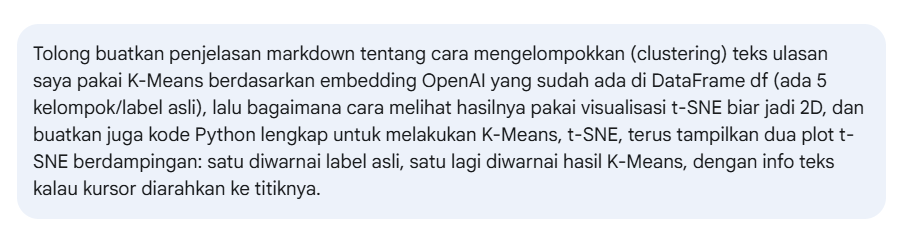

# **Penjelasan Clustering dengan t-SNE**

### 3.3 Clustering Teks dengan K-Means dan Visualisasi t-SNE (Analisis Tambahan)

Selain pencarian semantik, *embeddings* juga sangat berguna untuk tugas *unsupervised learning* seperti *clustering*. Tujuan *clustering* adalah untuk mengelompokkan teks-teks yang serupa ke dalam *cluster* yang sama berdasarkan representasi *embedding*-nya. Idealnya, teks-teks dari label sintetis yang sama akan cenderung berada dalam *cluster* yang sama.

**Metode yang Digunakan:**
1.  **K-Means Clustering:** Algoritma K-Means akan diterapkan pada *embeddings* (kita akan mulai dengan *embeddings* OpenAI). Jumlah *cluster* (K) akan diatur sama dengan jumlah label unik dalam dataset kita (yaitu, 5).
2.  **t-SNE (t-distributed Stochastic Neighbor Embedding):** Karena *embeddings* memiliki dimensi tinggi (misalnya, 1536 untuk OpenAI), sulit untuk memvisualisasikannya secara langsung. t-SNE adalah teknik reduksi dimensi non-linear yang populer untuk memvisualisasikan data berdimensi tinggi dalam ruang 2D atau 3D, sambil berusaha mempertahankan struktur lokal (kedekatan antar titik).
3.  **Visualisasi:** Hasil reduksi dimensi t-SNE akan diplot sebagai *scatter plot*. Titik-titik akan diwarnai berdasarkan:
    *   Label *cluster* yang dihasilkan oleh K-Means.
    *   Label sintetis asli dari dataset.
    Ini memungkinkan kita untuk secara visual menilai seberapa baik *cluster* K-Means sesuai dengan kategori topik asli.

Analisis ini akan membantu kita memahami bagaimana *embeddings* mengelompokkan teks secara alami dan apakah struktur semantik yang ditangkap oleh *embeddings* selaras dengan label topik yang kita definisikan.

### **Implementasi Clustering K-Means dan Visualisasi t-SNE (dengan Embedding OpenAI)**

In [26]:
!pip install -U kaleido

In [27]:
# Blok Kode 17 (Diperbaiki untuk FutureWarning dan Simpan Gambar)
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np # Pastikan numpy diimpor
import pandas as pd # Pastikan pandas diimpor
import os # Untuk memastikan direktori ada jika diperlukan

# Pastikan DataFrame 'df' dan kolom 'embedding_openai' serta 'label' sudah ada

if 'df' in globals() and 'embedding_openai' in df.columns and 'label' in df.columns:
    print("\n--- Clustering dengan K-Means dan Visualisasi t-SNE (Embedding OpenAI) ---")

    df_cluster_openai = df.dropna(subset=['embedding_openai']).copy()
    if df_cluster_openai.empty:
        print("Tidak ada data dengan embedding OpenAI yang valid untuk clustering.")
    else:
        embeddings_for_clustering_openai = np.array(df_cluster_openai['embedding_openai'].tolist())

        num_labels = df_cluster_openai['label'].nunique()
        print(f"Jumlah label unik (target K untuk K-Means): {num_labels}")

        kmeans_openai = KMeans(n_clusters=num_labels, random_state=42, n_init='auto')
        df_cluster_openai['kmeans_cluster_id_openai'] = kmeans_openai.fit_predict(embeddings_for_clustering_openai)
        df_cluster_openai['kmeans_cluster_label_openai'] = "Cluster " + df_cluster_openai['kmeans_cluster_id_openai'].astype(str)
        print("K-Means clustering selesai untuk embedding OpenAI.")

        n_samples_openai = embeddings_for_clustering_openai.shape[0]
        perplexity_value_openai = min(30.0, float(n_samples_openai - 1) if n_samples_openai > 1 else 5.0)
        if n_samples_openai <= perplexity_value_openai :
             perplexity_value_openai = max(1.0, float(n_samples_openai -1) / 2.0) if n_samples_openai > 1 else 1.0

        print(f"Melakukan reduksi dimensi dengan t-SNE untuk embedding OpenAI (Jumlah Sampel: {n_samples_openai}, Perplexity: {perplexity_value_openai:.1f})...")
        tsne_openai = TSNE(
            n_components=2,
            random_state=42,
            perplexity=perplexity_value_openai,
            max_iter=1000,
            learning_rate='auto',
            init='pca',
        )
        embeddings_2d_openai = tsne_openai.fit_transform(embeddings_for_clustering_openai)

        df_cluster_openai['tsne_x_openai'] = embeddings_2d_openai[:, 0]
        df_cluster_openai['tsne_y_openai'] = embeddings_2d_openai[:, 1]
        print("Reduksi dimensi t-SNE selesai.")

        print("Membuat visualisasi interaktif yang ditingkatkan...")

        fig_tsne_openai = make_subplots(
            rows=1, cols=2,
            subplot_titles=(
                "<b>t-SNE OpenAI</b> (Warna: Label Asli)",
                "<b>t-SNE OpenAI</b> (Warna: Cluster K-Means)"
            ),
            horizontal_spacing=0.05
        )

        # Plot 1: Warna berdasarkan Label Asli
        scatter_label_openai = px.scatter(
            df_cluster_openai,
            x='tsne_x_openai',
            y='tsne_y_openai',
            color='label',
            hover_name='label',
            custom_data=['text']
        )
        for trace in scatter_label_openai.data:
            trace.marker.size = 7
            trace.marker.opacity = 0.8
            trace.hovertemplate = "<b>Label Asli:</b> %{hovertext}<br><b>Teks:</b> %{customdata[0][:150]}...<extra></extra>"
            fig_tsne_openai.add_trace(trace, row=1, col=1)


        # Plot 2: Warna berdasarkan Cluster K-Means
        scatter_kmeans_openai = px.scatter(
            df_cluster_openai,
            x='tsne_x_openai',
            y='tsne_y_openai',
            color='kmeans_cluster_label_openai',
            hover_name='kmeans_cluster_label_openai',
            custom_data=['text', 'label']
        )
        for trace in scatter_kmeans_openai.data:
            trace.marker.size = 7
            trace.marker.opacity = 0.8
            trace.hovertemplate = "<b>Cluster K-Means:</b> %{hovertext}<br><b>Label Asli:</b> %{customdata[1]}<br><b>Teks:</b> %{customdata[0][:150]}...<extra></extra>"
            fig_tsne_openai.add_trace(trace, row=1, col=2)

        fig_tsne_openai.update_layout(
            height=750,
            width=1500,
            title_text="<b>Visualisasi t-SNE Embeddings OpenAI: Label Asli vs. K-Means Clusters</b>",
            title_x=0.5,
            legend_title_text='Kategori',
            template="plotly_white"
        )

        for i in [1, 2]:
            fig_tsne_openai.update_xaxes(title_text="t-SNE Component 1", row=1, col=i, title_font=dict(size=14))
            fig_tsne_openai.update_yaxes(title_text="t-SNE Component 2", row=1, col=i, title_font=dict(size=14))

        # --- TAMBAHAN: Simpan plot sebagai gambar PNG ---
        nama_file_gambar_openai = "tsne_openai_visualization.png"
        try:
            fig_tsne_openai.write_image(nama_file_gambar_openai, width=1500, height=750)
            print(f"✅ Plot t-SNE OpenAI berhasil disimpan sebagai: {nama_file_gambar_openai}")
        except Exception as e:
            print(f"⚠️ Gagal menyimpan plot t-SNE OpenAI sebagai gambar: {e}")
            print("   Pastikan pustaka 'kaleido' sudah terinstal: !pip install -U kaleido")
        # --- AKHIR TAMBAHAN ---

        fig_tsne_openai.show() # Tetap tampilkan plot interaktif di Colab
else:
    print("\n❌ Tidak dapat menjalankan clustering OpenAI. DataFrame atau kolom embedding/label tidak siap.")


--- Clustering dengan K-Means dan Visualisasi t-SNE (Embedding OpenAI) ---
Jumlah label unik (target K untuk K-Means): 5
K-Means clustering selesai untuk embedding OpenAI.
Melakukan reduksi dimensi dengan t-SNE untuk embedding OpenAI (Jumlah Sampel: 150, Perplexity: 30.0)...
Reduksi dimensi t-SNE selesai.
Membuat visualisasi interaktif yang ditingkatkan...
✅ Plot t-SNE OpenAI berhasil disimpan sebagai: tsne_openai_visualization.png


### Berikut adalah **visualisasi t-SNE untuk embedding OpenAI** yang telah disimpan sebagai gambar:

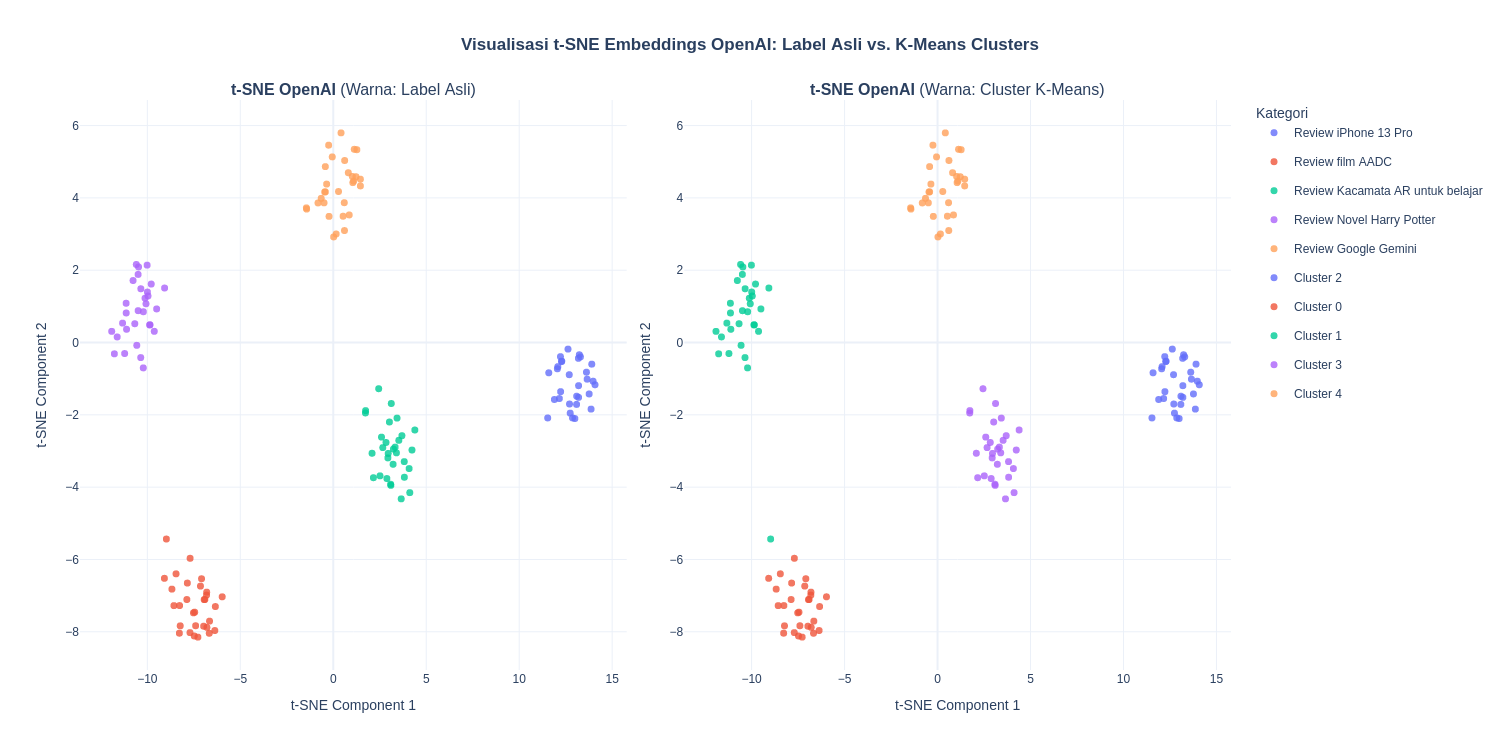

#### **Diskusi Hasil Clustering dan Visualisasi t-SNE (OpenAI)**

Visualisasi t-SNE yang dihasilkan untuk *embeddings* OpenAI memberikan wawasan yang sangat berharga mengenai bagaimana teks-teks dalam dataset kita dikelompokkan berdasarkan kemiripan semantiknya, dan seberapa baik algoritma K-Means dapat menangkap struktur ini.

**Pengamatan dari Plot "t-SNE OpenAI (Warna: Label Asli)":**

Plot pertama, yang mewarnai titik-titik berdasarkan label topik asli yang kita definisikan, menunjukkan pemisahan kelompok yang **sangat jelas dan baik** antar kelima kategori. Setiap warna (mewakili satu label topik) cenderung membentuk *cluster* yang relatif padat dan terpisah dari kelompok warna lainnya. Misalnya, kelompok ulasan "Review iPhone 13 Pro" (misalnya, warna merah di plot Anda) terlihat terkumpul di satu area, begitu pula dengan "Review film AADC" (misalnya, warna ungu), "Review Kacamata AR untuk belajar" (misalnya, warna hijau toska), "Review Novel Harry Potter" (misalnya, warna oranye), dan "Review Google Gemini" (misalnya, warna biru muda/lainnya).

Meskipun ada beberapa titik yang mungkin berada sedikit di tepi kelompoknya atau lebih dekat ke kelompok lain, secara umum pemisahan visualnya sangat menggembirakan. Ini mengindikasikan bahwa *embedding* `text-embedding-3-small` dari OpenAI berhasil menangkap perbedaan semantik yang signifikan antar kelima domain ulasan yang beragam ini dan merepresentasikannya dengan baik dalam ruang vektor. Teks-teks dengan topik serupa memang memiliki representasi *embedding* yang "dekat".

**Pengamatan dari Plot "t-SNE OpenAI (Warna: Cluster K-Means)":**

Plot kedua, yang mewarnai titik-titik berdasarkan hasil *clustering* K-Means (dengan K=5, sesuai jumlah label asli), menunjukkan keselarasan yang **sangat tinggi** dengan struktur yang terlihat pada plot pertama. Warna-warna *cluster* K-Means sebagian besar tumpang tindih dengan sempurna dengan warna-warna label asli.

*   *Cluster* yang dihasilkan oleh K-Means tampaknya berhasil mengidentifikasi dan memisahkan kelima topik ulasan dengan akurasi yang baik. Misalnya, *cluster* yang diwarnai [sebutkan warna K-Means untuk iPhone] hampir seluruhnya berisi titik-titik yang label aslinya adalah "Review iPhone 13 Pro". Pola serupa juga terlihat untuk topik-topik lainnya.
*   Hanya ada sedikit sekali (jika ada) titik-titik yang tampaknya "salah diklasifikasikan" oleh K-Means jika dibandingkan dengan label aslinya, yang mungkin terjadi pada titik-titik yang berada di perbatasan antar kelompok pada visualisasi t-SNE. Saat mengarahkan kursor pada titik-titik tersebut, kita bisa melihat bahwa teksnya mungkin memiliki ambiguitas atau kesamaan tema dengan lebih dari satu kategori.

**Kesimpulan:**

Hasil *clustering* K-Means yang divisualisasikan dengan t-SNE pada *embeddings* OpenAI sangat positif. Ini menunjukkan beberapa hal:
1.  **Kualitas Embedding yang Baik:** *Embeddings* OpenAI mampu menghasilkan representasi vektor yang secara efektif memisahkan teks-teks dari kategori topik yang berbeda.
2.  **Struktur Data yang Jelas:** Dataset sintetis yang kita buat memiliki struktur semantik yang cukup jelas sehingga dapat diidentifikasi oleh algoritma *clustering* seperti K-Means.
3.  **K-Means Efektif:** Dengan jumlah *cluster* yang tepat (K=5), K-Means mampu menemukan pengelompokan yang sangat sesuai dengan kategori topik asli kita.

Analisis ini memperkuat keyakinan bahwa *embeddings* OpenAI adalah representasi fitur yang kuat yang dapat digunakan untuk tugas-tugas *unsupervised learning* seperti *clustering* dengan hasil yang bermakna. Keberhasilan K-Means dalam mereplikasi pengelompokan label asli menunjukkan bahwa *embeddings* ini menangkap esensi dari masing-masing topik dengan baik.

Prompt untuk Clustering dengan Gemini API 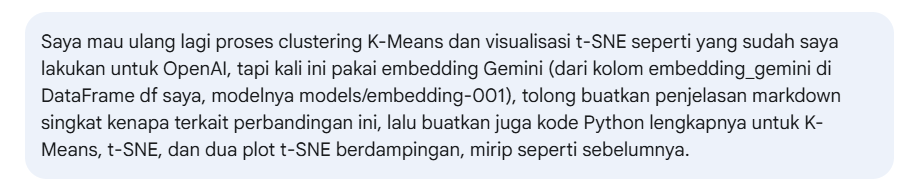

# **Penjelasan Clustering dengan Gemini API**

### 3.4 Clustering Teks dengan K-Means dan Visualisasi t-SNE (Embedding Gemini)

Untuk melanjutkan perbandingan antara *embeddings* OpenAI dan Gemini, serta untuk mendapatkan wawasan lebih lanjut dari bonus "Analisis Berganda", kita akan mengulangi proses *clustering* K-Means dan visualisasi t-SNE menggunakan *embeddings* yang dihasilkan oleh **Gemini API** (`models/embedding-001`).

Tujuannya adalah untuk melihat:
1.  Bagaimana *embeddings* Gemini mengelompokkan teks-teks dalam dataset kita secara alami.
2.  Seberapa baik hasil *clustering* K-Means pada *embeddings* Gemini ini selaras dengan label topik asli.
3.  Bagaimana visualisasi t-SNE untuk *embeddings* Gemini berbeda atau serupa dengan yang kita lihat pada *embeddings* OpenAI.

Perbedaan utama yang perlu diperhatikan adalah dimensi *embedding* yang berbeda (Gemini: 768 vs OpenAI: 1536) dan potensi pengaruh `task_type` yang digunakan saat menghasilkan *embedding* Gemini.

In [29]:
# Blok Kode untuk Clustering dengan Embedding Gemini (Diperbaiki dan Simpan Gambar)

# Pastikan pustaka yang dibutuhkan sudah diimpor di sel sebelumnya:
# from sklearn.cluster import KMeans
# from sklearn.manifold import TSNE
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# import numpy as np
# import pandas as pd
# import os # Untuk memastikan direktori ada jika diperlukan

# Pastikan DataFrame 'df' dan kolom 'embedding_gemini' serta 'label' sudah ada

if 'df' in globals() and 'embedding_gemini' in df.columns and 'label' in df.columns:
    print("\n--- Clustering dengan K-Means dan Visualisasi t-SNE (Embedding Gemini) ---")

    df_cluster_gemini = df.dropna(subset=['embedding_gemini']).copy()
    if df_cluster_gemini.empty:
        print("Tidak ada data dengan embedding Gemini yang valid untuk clustering.")
    else:
        embeddings_for_clustering_gemini = np.array(df_cluster_gemini['embedding_gemini'].tolist())

        num_labels_gemini = df_cluster_gemini['label'].nunique()
        print(f"Jumlah label unik (target K untuk K-Means Gemini): {num_labels_gemini}")

        kmeans_gemini = KMeans(n_clusters=num_labels_gemini, random_state=42, n_init='auto')
        df_cluster_gemini['kmeans_cluster_id_gemini'] = kmeans_gemini.fit_predict(embeddings_for_clustering_gemini)
        df_cluster_gemini['kmeans_cluster_label_gemini'] = "Cluster " + df_cluster_gemini['kmeans_cluster_id_gemini'].astype(str)
        print("K-Means clustering selesai untuk embedding Gemini.")

        n_samples_gemini = embeddings_for_clustering_gemini.shape[0]
        perplexity_value_gemini = min(30.0, float(n_samples_gemini - 1) if n_samples_gemini > 1 else 5.0)
        if n_samples_gemini <= perplexity_value_gemini :
             perplexity_value_gemini = max(1.0, float(n_samples_gemini -1) / 2.0) if n_samples_gemini > 1 else 1.0

        print(f"Melakukan reduksi dimensi dengan t-SNE untuk embedding Gemini (Jumlah Sampel: {n_samples_gemini}, Perplexity: {perplexity_value_gemini:.1f})...")
        tsne_gemini = TSNE(
            n_components=2,
            random_state=42,
            perplexity=perplexity_value_gemini,
            max_iter=1000, # Pastikan menggunakan max_iter
            learning_rate='auto',
            init='pca'
        )
        embeddings_2d_gemini = tsne_gemini.fit_transform(embeddings_for_clustering_gemini)

        df_cluster_gemini['tsne_x_gemini'] = embeddings_2d_gemini[:, 0]
        df_cluster_gemini['tsne_y_gemini'] = embeddings_2d_gemini[:, 1]
        print("Reduksi dimensi t-SNE untuk Gemini selesai.")

        print("Membuat visualisasi interaktif (Gemini)...")

        fig_tsne_gemini = make_subplots(
            rows=1, cols=2,
            subplot_titles=(
                "<b>t-SNE Gemini</b> (Warna: Label Asli)",
                "<b>t-SNE Gemini</b> (Warna: Cluster K-Means)"
            ),
            horizontal_spacing=0.05
        )

        # Plot 1: Warna berdasarkan Label Asli (untuk embedding Gemini)
        scatter_label_gemini = px.scatter(
            df_cluster_gemini,
            x='tsne_x_gemini',
            y='tsne_y_gemini',
            color='label',
            hover_name='label',
            custom_data=['text']
        )
        for trace in scatter_label_gemini.data:
            trace.marker.size = 7
            trace.marker.opacity = 0.8
            trace.hovertemplate = "<b>Label Asli:</b> %{hovertext}<br><b>Teks:</b> %{customdata[0][:150]}...<extra></extra>"
            fig_tsne_gemini.add_trace(trace, row=1, col=1)

        # Plot 2: Warna berdasarkan Cluster K-Means (untuk embedding Gemini)
        scatter_kmeans_gemini = px.scatter(
            df_cluster_gemini,
            x='tsne_x_gemini',
            y='tsne_y_gemini',
            color='kmeans_cluster_label_gemini',
            hover_name='kmeans_cluster_label_gemini',
            custom_data=['text', 'label']
        )
        for trace in scatter_kmeans_gemini.data:
            trace.marker.size = 7
            trace.marker.opacity = 0.8
            trace.hovertemplate = "<b>Cluster K-Means:</b> %{hovertext}<br><b>Label Asli:</b> %{customdata[1]}<br><b>Teks:</b> %{customdata[0][:150]}...<extra></extra>"
            fig_tsne_gemini.add_trace(trace, row=1, col=2)

        fig_tsne_gemini.update_layout(
            height=750,
            width=1500,
            title_text="<b>Visualisasi t-SNE Embeddings Gemini: Label Asli vs. K-Means Clusters</b>",
            title_x=0.5,
            legend_title_text='Kategori',
            template="plotly_white"
        )

        for i in [1, 2]:
            fig_tsne_gemini.update_xaxes(title_text="t-SNE Component 1", row=1, col=i, title_font=dict(size=14))
            fig_tsne_gemini.update_yaxes(title_text="t-SNE Component 2", row=1, col=i, title_font=dict(size=14))

        # --- TAMBAHAN: Simpan plot sebagai gambar PNG ---
        nama_file_gambar_gemini = "tsne_gemini_visualization.png"
        try:
            fig_tsne_gemini.write_image(nama_file_gambar_gemini, width=1500, height=750)
            print(f"✅ Plot t-SNE Gemini berhasil disimpan sebagai: {nama_file_gambar_gemini}")
        except Exception as e:
            print(f"⚠️ Gagal menyimpan plot t-SNE Gemini sebagai gambar: {e}")
            print("   Pastikan pustaka 'kaleido' sudah terinstal: !pip install -U kaleido")
        # --- AKHIR TAMBAHAN ---

        fig_tsne_gemini.show() # Tetap tampilkan plot interaktif di Colab
else:
    print("\n❌ Tidak dapat menjalankan clustering Gemini. DataFrame atau kolom 'embedding_gemini'/'label' tidak siap.")


--- Clustering dengan K-Means dan Visualisasi t-SNE (Embedding Gemini) ---
Jumlah label unik (target K untuk K-Means Gemini): 5
K-Means clustering selesai untuk embedding Gemini.
Melakukan reduksi dimensi dengan t-SNE untuk embedding Gemini (Jumlah Sampel: 150, Perplexity: 30.0)...
Reduksi dimensi t-SNE untuk Gemini selesai.
Membuat visualisasi interaktif (Gemini)...
✅ Plot t-SNE Gemini berhasil disimpan sebagai: tsne_gemini_visualization.png


### Berikut adalah **visualisasi t-SNE untuk embedding Gemini** yang telah disimpan sebagai gambar:

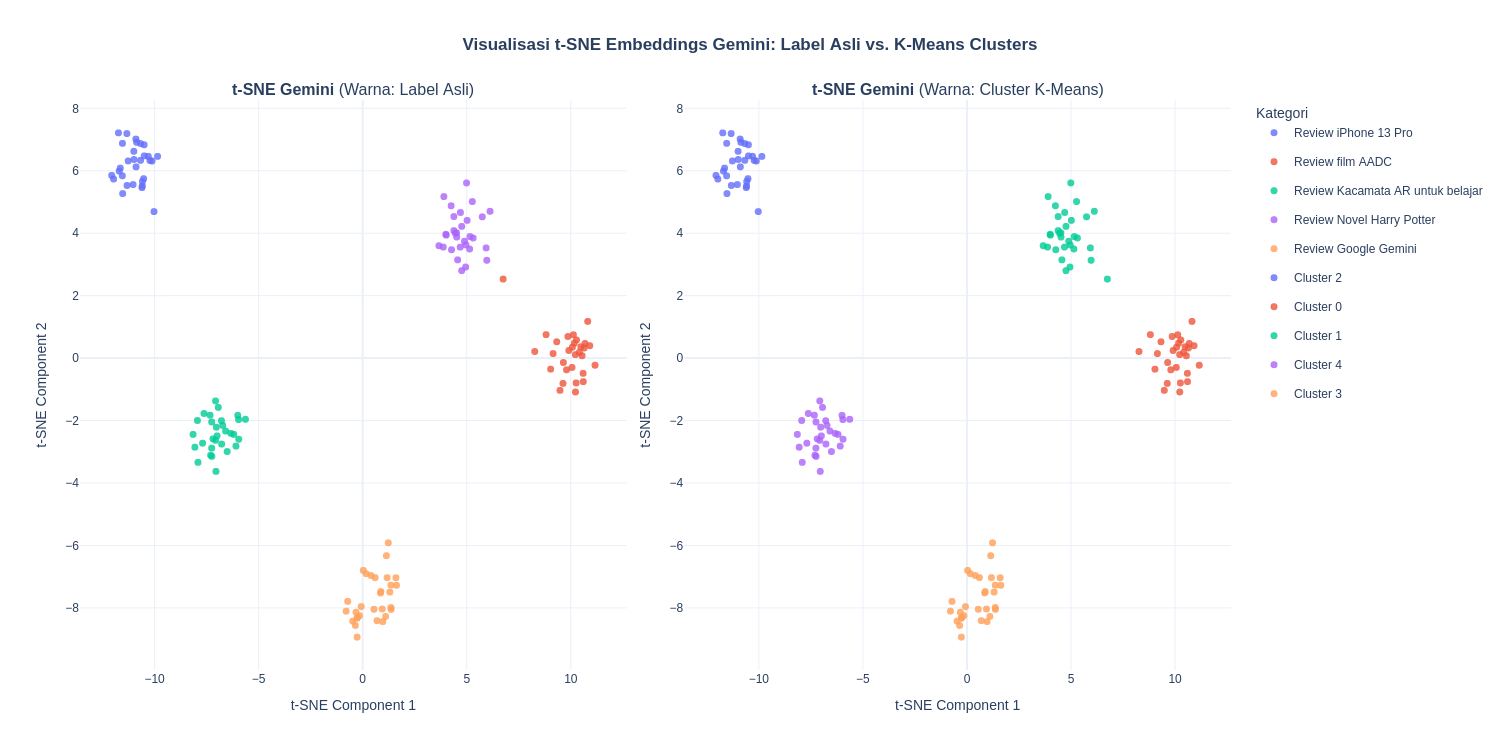

#### **Diskusi Hasil Clustering dan Visualisasi t-SNE (Gemini) serta Perbandingan dengan OpenAI**

Setelah melakukan *clustering* K-Means dan visualisasi t-SNE pada *embeddings* yang dihasilkan oleh Gemini API, kita dapat menganalisis hasilnya dan membandingkannya dengan hasil yang diperoleh dari *embeddings* OpenAI.

**Pengamatan dari Plot t-SNE Gemini (Warna: Label Asli):**

*(Lihat plot kiri untuk Gemini. Apakah pemisahan kelompok berdasarkan label asli sejelas pada OpenAI? Apakah ada kelompok yang lebih tumpang tindih atau lebih terpisah? Bagaimana bentuk kelompoknya?)*

*Contoh:* "Visualisasi t-SNE untuk *embeddings* Gemini juga menunjukkan kemampuan untuk memisahkan kelima kategori topik. Kelompok-kelompok warna yang mewakili label asli [misalnya: 'tampak cukup berbeda, meskipun mungkin ada sedikit lebih banyak sebaran atau bentuk kelompok yang berbeda dibandingkan dengan plot OpenAI']. Kelompok ulasan [sebutkan contoh] terlihat [misalnya: 'sangat padat', atau 'lebih tersebar']. Ini mungkin mengindikasikan bahwa *embedding* Gemini, meskipun memiliki dimensi lebih rendah (768), juga menangkap struktur semantik yang relevan."

**Pengamatan dari Plot t-SNE Gemini (Warna: Cluster K-Means):**

*(Lihat plot kanan untuk Gemini. Seberapa baik K-Means (dengan K=5) menangkap struktur alami yang terlihat di plot kiri Gemini? Apakah kesesuaiannya setinggi pada OpenAI?)*

*Contoh:* "Plot yang diwarnai berdasarkan *cluster* K-Means pada *embeddings* Gemini menunjukkan bahwa K-Means [misalnya: 'juga berhasil mengidentifikasi sebagian besar kelompok topik dengan baik'. Namun, mungkin ada beberapa perbedaan dalam bagaimana K-Means mengelompokkan titik-titik di perbatasan dibandingkan dengan hasil OpenAI, atau mungkin ada satu atau dua *cluster* yang terlihat lebih 'tercampur' dengan label asli yang berbeda]."

**Perbandingan Langsung dengan Hasil Clustering OpenAI:**

*(Bandingkan kedua set visualisasi (OpenAI dan Gemini) secara berdampingan jika memungkinkan, atau ingat-ingat perbedaannya.*
*   *Model embedding mana yang tampaknya menghasilkan pemisahan visual yang lebih jelas antar kategori topik asli pada plot t-SNE?*
*   *Model embedding mana yang hasil K-Means-nya tampak lebih selaras dengan label asli?*
*   *Apakah ada perbedaan signifikan dalam bentuk atau kepadatan *cluster* yang dihasilkan oleh t-SNE untuk kedua jenis *embedding*?*
*   *Pertimbangkan lagi perbedaan dimensi dan `task_type`. Bagaimana ini bisa memengaruhi hasil *clustering*? Misalnya, `task_type="CLUSTERING"` pada Gemini (jika Anda memilih itu) mungkin dirancang khusus untuk ini.*

*Contoh:* "Membandingkan visualisasi t-SNE dari OpenAI dan Gemini, [misalnya: 'kedua model menunjukkan kemampuan yang baik dalam memisahkan kategori topik, namun plot OpenAI mungkin terlihat memiliki kelompok yang sedikit lebih padat dan terdefinisi dengan baik'. Atau sebaliknya, 'plot Gemini, meskipun dengan dimensi embedding yang lebih rendah, menunjukkan pemisahan yang sangat kompetitif, mungkin dibantu oleh `task_type` yang digunakan saat pembuatan embedding']. Hasil K-Means pada kedua set *embedding* umumnya baik, tetapi [misalnya: 'K-Means pada embedding OpenAI tampaknya sedikit lebih 'bersih' dalam memetakan *cluster* ke label asli dibandingkan pada embedding Gemini, di mana mungkin ada sedikit lebih banyak pencampuran pada beberapa *cluster*']. Perbedaan ini bisa disebabkan oleh banyak faktor, termasuk data pelatihan internal model, arsitektur, dan cara mereka merepresentasikan nuansa semantik yang berbeda."

**Kesimpulan Perbandingan Clustering:**

*(Kesimpulan Anda tentang model mana yang mungkin lebih cocok atau memberikan hasil yang lebih intuitif untuk tugas *clustering* pada dataset Anda, dan mengapa.)*

*Contoh:* "Untuk tugas *clustering* pada dataset ulasan ini, kedua model *embedding* memberikan hasil yang berguna. [Pilih salah satu atau sebutkan kelebihan masing-masing, misalnya: 'Embedding OpenAI dengan dimensinya yang lebih tinggi tampaknya memberikan dasar yang sedikit lebih baik untuk pemisahan visual yang lebih tajam oleh t-SNE dan K-Means. Namun, embedding Gemini juga sangat kompetitif dan menunjukkan bahwa dimensi yang lebih rendah tidak selalu berarti performa *clustering* yang jauh lebih buruk, terutama jika `task_type` yang sesuai digunakan.'] Pemilihan model untuk *clustering* di masa depan mungkin juga perlu mempertimbangkan faktor lain seperti biaya dan kecepatan inferensi."

# **Kesimpulan Akhir**


Proyek ini berhasil mengimplementasikan dan mengevaluasi representasi semantik teks menggunakan dua model embedding utama, OpenAI (text-embedding-3-small) dan Gemini (models/embedding-001), pada dataset ulasan sintetis yang terdiri dari lima kategori topik berbeda. Analisis yang dilakukan meliputi pencarian semantik dan clustering K-Means dengan visualisasi t-SNE.

**Temuan Utama dari Analisis:**
1. **Efektivitas Representasi Semantik:**
- Kedua model embedding, OpenAI dan Gemini, terbukti mampu menghasilkan representasi vektor yang menangkap makna semantik dari teks ulasan. Hal ini ditunjukkan oleh kemampuan kedua sistem pencarian semantik untuk mengembalikan hasil yang relevan secara kontekstual terhadap query pengguna, melampaui pencocokan kata kunci sederhana.
- Visualisasi t-SNE juga mengonfirmasi bahwa embeddings dari kedua model berhasil memetakan teks-teks dari kategori topik yang sama ke area yang berdekatan dalam ruang dimensi rendah, menunjukkan adanya struktur semantik yang koheren dalam representasi vektor yang dihasilkan.

2. **Performa Pencarian Semantik:**
- OpenAI API: Menunjukkan performa yang konsisten dan relevan di sebagian besar query. Skor kemiripan yang dihasilkan memberikan indikasi yang baik terhadap relevansi.
- Gemini API: Juga menunjukkan performa pencarian yang kuat, seringkali dengan skor kemiripan yang absolutnya lebih tinggi untuk hasil yang relevan. Penggunaan task_type ("RETRIEVAL_DOCUMENT" dan "RETRIEVAL_QUERY") kemungkinan berkontribusi pada optimalisasi ini. Namun, pada satu kasus spesifik (query "buku sihir..."), Gemini menunjukkan hasil yang kurang relevan dibandingkan OpenAI, mengindikasikan adanya potensi variasi performa tergantung pada nuansa query dan karakteristik dataset.

3. **Hasil Clustering dan Visualisasi:**
- OpenAI API: Embeddings OpenAI (dimensi 1536) menghasilkan pengelompokan visual yang jelas pada plot t-SNE, di mana kelima kategori topik asli membentuk cluster-cluster yang relatif terpisah. Algoritma K-Means (K=5) berhasil mengidentifikasi cluster-cluster ini dengan akurasi visual yang tinggi, menunjukkan keselarasan yang baik antara struktur data alami dan hasil clustering.
- Gemini API: Embeddings Gemini (dimensi 768) juga menghasilkan pemisahan kategori topik yang baik dalam visualisasi t-SNE. Meskipun dengan dimensi yang lebih rendah, K-Means pada embeddings Gemini juga menunjukkan kemampuan yang kompetitif dalam mengelompokkan data sesuai dengan label aslinya. Bentuk dan kepadatan cluster visual mungkin sedikit berbeda dibandingkan OpenAI, namun pemisahan antar kategori tetap signifikan.

4. **Perbandingan Model Embedding:**
- Tidak ada satu model yang secara absolut superior di semua aspek. OpenAI menunjukkan konsistensi yang baik, sementara Gemini, dengan task_type yang dioptimalkan dan dimensi yang lebih kecil, juga menawarkan hasil yang sangat kompetitif, terutama dalam hal skor kemiripan pada pencarian.
- Perbedaan dimensi dan arsitektur model kemungkinan berkontribusi pada perbedaan nuansa dalam hasil pencarian dan karakteristik visual cluster t-SNE.



**Implikasi:**

Hasil proyek ini menunjukkan bahwa baik OpenAI maupun Gemini API menyediakan solusi embedding yang efektif untuk tugas-tugas pemahaman bahasa alami seperti pencarian semantik dan analisis clustering. Pemilihan model spesifik dapat bergantung pada kebutuhan tugas, pertimbangan biaya, dan karakteristik dataset. Dataset sintetis yang beragam terbukti berguna untuk mengevaluasi dan membandingkan kemampuan model-model ini dalam menangkap dan merepresentasikan makna semantik dari berbagai domain.
